## Data Story

This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University. This is part of the data that was used in the 1988 ASA Graphics Section Poster Session. The salary data were originally from Sports Illustrated, April 20, 1987. The 1986 and career statistics were obtained from The 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York.

### Format
A data frame with 322 observations of major league players on the following 20 variables:

- **AtBat**: Number of times at bat in 1986
- **Hits**: Number of hits in 1986
- **HmRun**: Number of home runs in 1986
- **Runs**: Number of runs in 1986
- **RBI**: Number of runs batted in in 1986
- **Walks**: Number of walks in 1986
- **Years**: Number of years in the major leagues
- **CAtBat**: Number of times at bat during his career
- **CHits**: Number of hits during his career
- **CHmRun**: Number of home runs during his career
- **CRuns**: Number of runs during his career
- **CRBI**: Number of runs batted in during his career
- **CWalks**: Number of walks during his career
- **League**: A factor with levels A and N indicating player’s league at the end of 1986
- **Division**: A factor with levels E and W indicating player’s division at the end of 1986
- **PutOuts**: Number of put outs in 1986
- **Assists**: Number of assists in 1986
- **Errors**: Number of errors in 1986
- **Salary**: 1987 annual salary on opening day in thousands of dollars
- **NewLeague**: A factor with levels A and N indicating player’s league at the beginning of 1987
result 1 is Yes and 0 is No"

The main goal of the dataset was to analyze the players' 1986 performance and career statistics, examining how these influenced their salaries. This analysis was presented during the **1988 American Statistical Association (ASA) Graphics Section Poster Session** and garnered significant attention.
...


## Import Necessary Libraries and 

In [1]:
import os
os.chdir('C:\\Users\\Harun\\Desktop\\Yazılım\\i_akademi_veri_bilimi')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math

In [4]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.3f" %x)

## Import Dataset

In [8]:
data = pd.read_csv("Hitters.csv")
df = data.copy()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N


In [10]:
def check_df(dataframe):
    print(20*"#", "Head", 20*"#")
    print(dataframe.head())
    print(20*"#", "Tail", 20*"#")
    print(dataframe.tail())
    print(20*"#", "Shape", 20*"#")
    print(dataframe.shape)
    print(20*"#", "Types", 20*"#")
    print(dataframe.dtypes)
    print(20*"#", "Null", 20*"#")
    print(dataframe.isnull().sum())
    print(20*"#", "Quartiles", 20*"#")
    print(dataframe.describe([0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]).T) 

In [12]:
check_df(df)

#################### Head ####################
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague
0    293    66      1    30   29     14      1     293     66       1     30    29      14      A        E      446       33      20     NaN         A
1    315    81      7    24   38     39     14    3449    835      69    321   414     375      N        W      632       43      10 475.000         N
2    479   130     18    66   72     76      3    1624    457      63    224   266     263      A        W      880       82      14 480.000         A
3    496   141     20    65   78     37     11    5628   1575     225    828   838     354      N        E      200       11       3 500.000         N
4    321    87     10    39   42     30      2     396    101      12     48    46      33      N        E      805       40       4  91.500         N
#################### Tail ####################


## Analysis of Categorical and Numerical Variables

In [15]:
def grab_col_names(dataframe, cat_th = 10, car_th=20, report=False):
    #category
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["object", "category", "bool"]]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and str(dataframe[col].dtypes) in ["int64", "float64", "uint8"]]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["object", "category"]]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    #numeric
    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64", "uint8"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    if report:
        print(f"Observation: {dataframe.shape[0]}")
        print(f"Observation: {dataframe.shape[1]}")
        print(f"num_cols ==> {len(num_cols)} adet")
        print(f"cat_but_car ==> {len(cat_but_car)} adet")
        print(f"num_but_cat ==> {len(num_but_cat)} adet") 
        print(f"cat_cols total ==> {len(cat_cols)} adet")

    return cat_cols, num_cols, num_but_cat, cat_but_car

    
        
        
    
    

In [17]:
grab_col_names(df, report=True)

Observation: 322
Observation: 20
num_cols ==> 17 adet
cat_but_car ==> 0 adet
num_but_cat ==> 0 adet
cat_cols total ==> 3 adet


(['League', 'Division', 'NewLeague'],
 ['AtBat',
  'Hits',
  'HmRun',
  'Runs',
  'RBI',
  'Walks',
  'Years',
  'CAtBat',
  'CHits',
  'CHmRun',
  'CRuns',
  'CRBI',
  'CWalks',
  'PutOuts',
  'Assists',
  'Errors',
  'Salary'],
 [],
 [])

In [19]:
def cat_summary(dataframe, col_name, plot=False):
    print(20*"#", col_name, 20*"#")
    pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                 "Ratio:": 100 * dataframe[col_name].value_counts()/len(dataframe)})
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

#################### League ####################


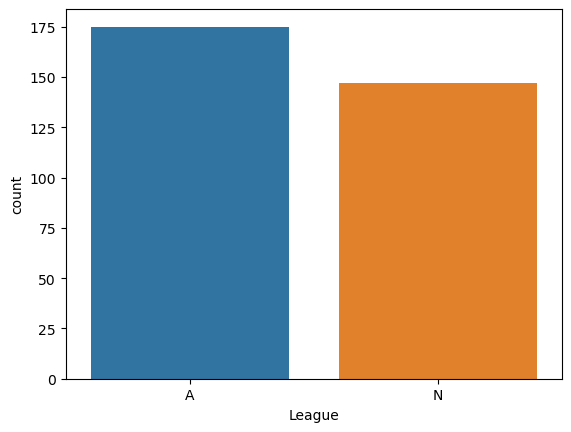

In [21]:
cat_summary(df, "League", plot=True)

In [23]:
def cat_summary_df(dataframe):
    cat_cols, num_cols, num_but_cat, cat_but_car = grab_col_names(dataframe)
    for col in cat_cols:
        if str(dataframe[col].dtypes) == "bool":
            new_df = pd.DataFrame()
            new_df[col] = dataframe[col].astype(int)
            cat_summary(new_df, col, plot=True)
        else:
            cat_summary(dataframe, col, plot=True)

#################### League ####################


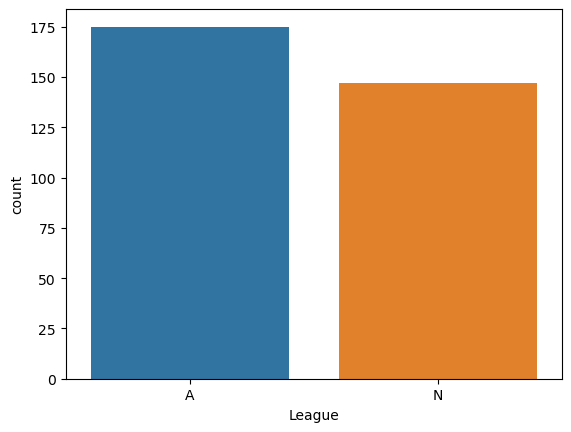

#################### Division ####################


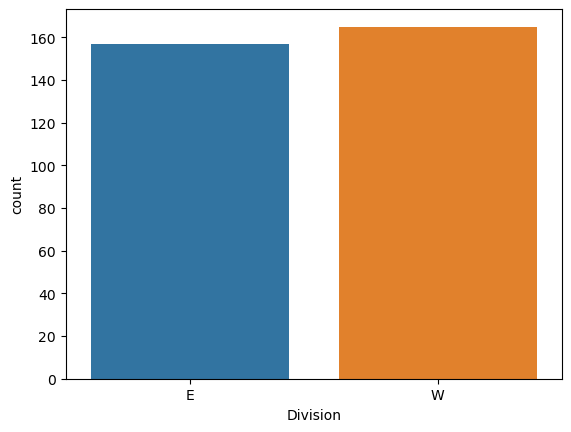

#################### NewLeague ####################


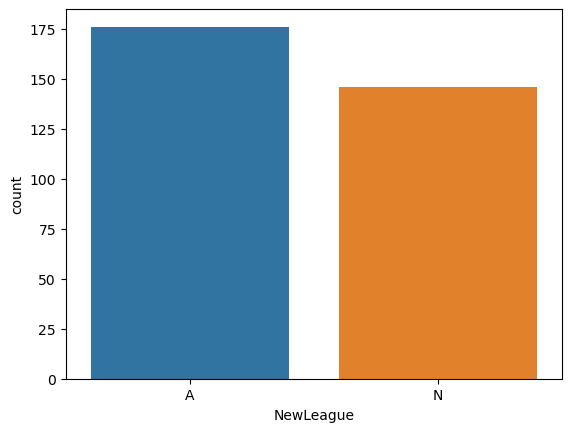

In [25]:
cat_summary_df(df)

In [27]:
def num_summary(dataframe, num_col, plot=False):
    print("20*#", num_col, "20*#")
    quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[num_col].describe(quantiles).T)

    if plot:
        dataframe[num_col].hist(bins=20)
        plt.xlabel(num_col)
        plt.title(num_col)
        plt.show(block=True)

20*# CWalks 20*#
count    322.000
mean     260.239
std      267.058
min        0.000
1%         4.000
5%        15.050
10%       30.100
20%       55.000
30%       82.000
40%      117.400
50%      170.500
60%      226.600
70%      300.700
80%      421.000
90%      643.900
95%      817.600
99%     1139.140
max     1566.000
Name: CWalks, dtype: float64


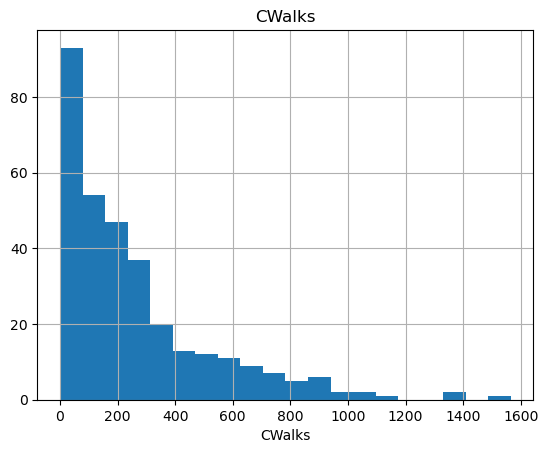

In [29]:
num_summary(df, "CWalks", plot=True)

In [31]:
def num_summary_df(dataframe, plot=False):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
    for col in num_cols:
        num_summary(dataframe, col, plot=True)
    

20*# AtBat 20*#
count   322.000
mean    380.929
std     153.405
min      16.000
1%       20.420
5%      161.000
10%     194.100
20%     221.800
30%     281.300
40%     321.800
50%     379.500
60%     430.200
70%     490.000
80%     535.600
90%     584.900
95%     609.900
99%     658.590
max     687.000
Name: AtBat, dtype: float64


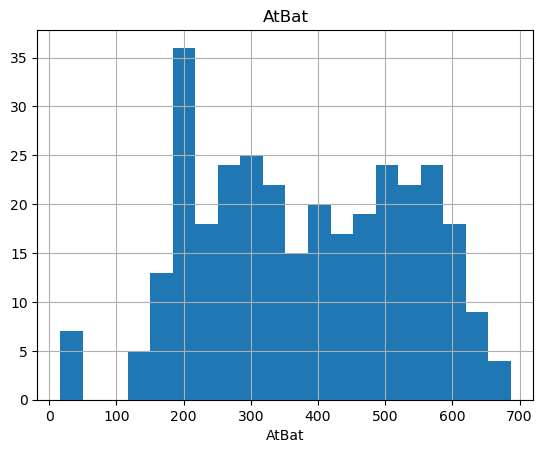

20*# Hits 20*#
count   322.000
mean    101.025
std      46.455
min       1.000
1%        4.420
5%       39.000
10%      45.100
20%      57.000
30%      70.000
40%      82.000
50%      96.000
60%     113.000
70%     128.700
80%     144.000
90%     163.000
95%     174.000
99%     210.790
max     238.000
Name: Hits, dtype: float64


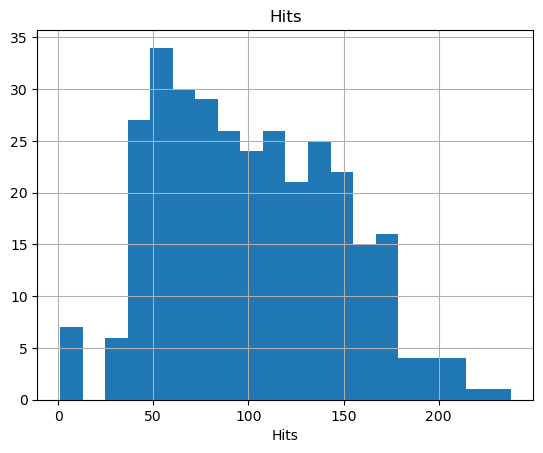

20*# HmRun 20*#
count   322.000
mean     10.770
std       8.709
min       0.000
1%        0.000
5%        0.000
10%       1.000
20%       3.000
30%       5.000
40%       6.000
50%       8.000
60%      10.600
70%      14.000
80%      18.000
90%      24.000
95%      28.950
99%      33.000
max      40.000
Name: HmRun, dtype: float64


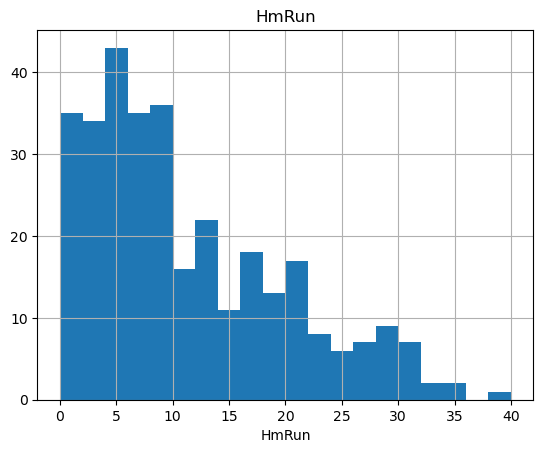

20*# Runs 20*#
count   322.000
mean     50.910
std      26.024
min       0.000
1%        1.210
5%       17.000
10%      20.100
20%      27.000
30%      33.000
40%      41.000
50%      48.000
60%      55.600
70%      66.000
80%      75.800
90%      89.000
95%      94.000
99%     107.790
max     130.000
Name: Runs, dtype: float64


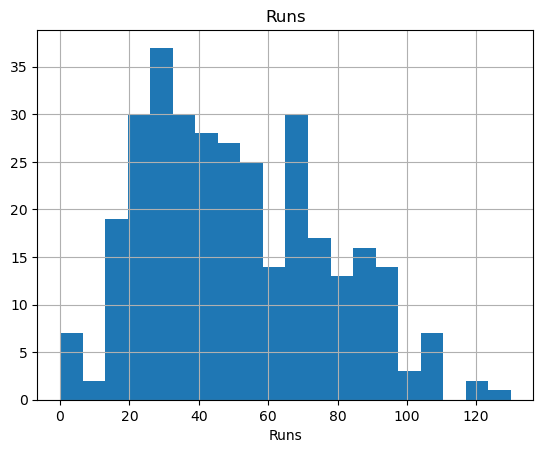

20*# RBI 20*#
count   322.000
mean     48.028
std      26.167
min       0.000
1%        2.000
5%       14.000
10%      19.000
20%      26.000
30%      30.000
40%      36.400
50%      44.000
60%      49.000
70%      58.000
80%      73.000
90%      86.000
95%      96.000
99%     112.370
max     121.000
Name: RBI, dtype: float64


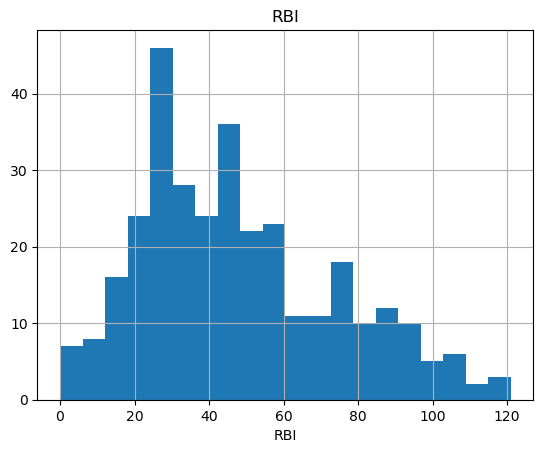

20*# Walks 20*#
count   322.000
mean     38.742
std      21.639
min       0.000
1%        1.000
5%       11.050
10%      15.000
20%      20.000
30%      24.000
40%      30.000
50%      35.000
60%      40.000
70%      48.700
80%      59.000
90%      69.900
95%      78.000
99%      93.580
max     105.000
Name: Walks, dtype: float64


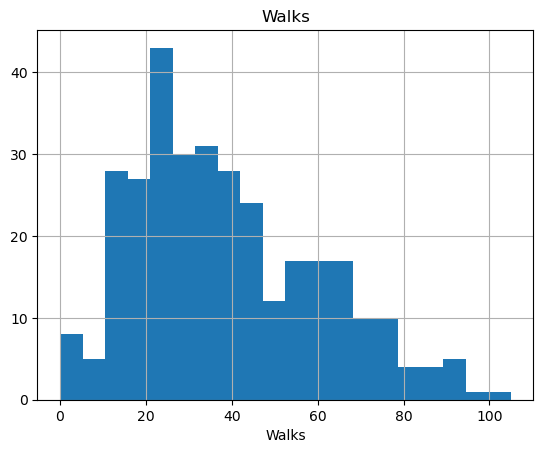

20*# Years 20*#
count   322.000
mean      7.444
std       4.926
min       1.000
1%        1.000
5%        1.000
10%       2.000
20%       3.000
30%       4.000
40%       5.000
50%       6.000
60%       7.600
70%      10.000
80%      12.000
90%      15.000
95%      17.000
99%      19.790
max      24.000
Name: Years, dtype: float64


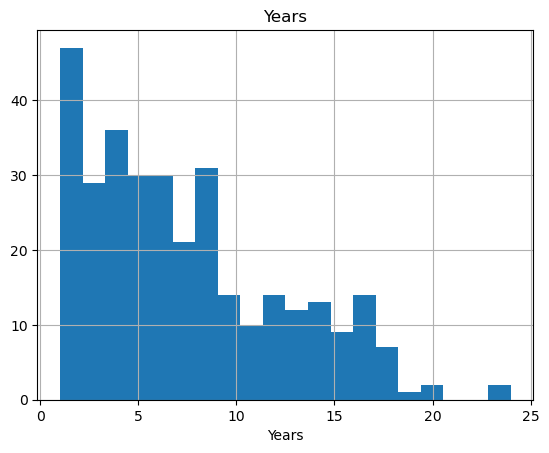

20*# CAtBat 20*#
count     322.000
mean     2648.683
std      2324.206
min        19.000
1%         41.000
5%        216.500
10%       342.200
20%       667.600
30%       963.400
40%      1402.200
50%      1928.000
60%      2654.000
70%      3365.000
80%      4483.000
90%      6123.400
95%      7125.600
99%      8749.970
max     14053.000
Name: CAtBat, dtype: float64


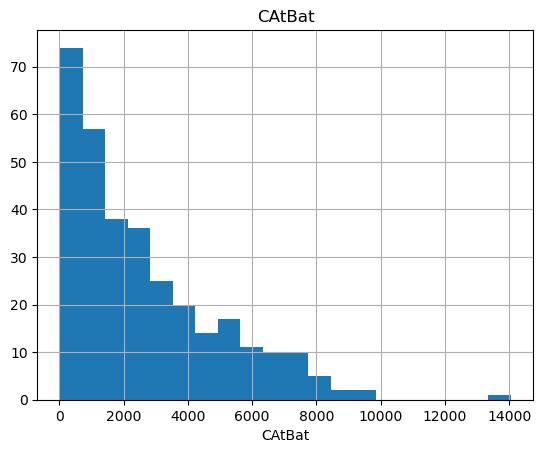

20*# CHits 20*#
count    322.000
mean     717.571
std      654.473
min        4.000
1%         9.840
5%        54.000
10%       86.000
20%      164.600
30%      238.000
40%      355.800
50%      508.000
60%      708.200
70%      911.100
80%     1229.200
90%     1659.600
95%     2017.150
99%     2500.340
max     4256.000
Name: CHits, dtype: float64


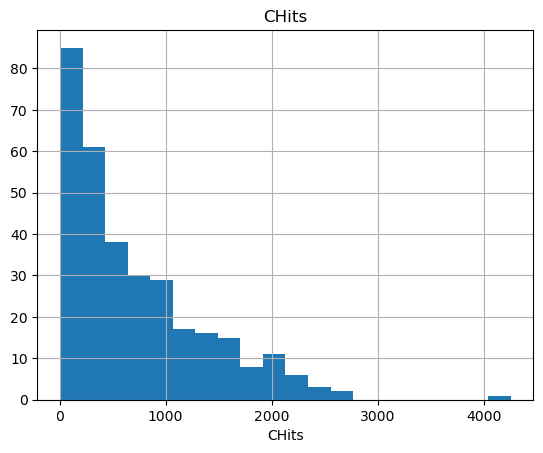

20*# CHmRun 20*#
count   322.000
mean     69.491
std      86.266
min       0.000
1%        0.000
5%        2.000
10%       4.000
20%      10.200
30%      16.300
40%      27.400
50%      37.500
60%      51.200
70%      72.400
80%     103.800
90%     194.900
95%     265.650
99%     373.120
max     548.000
Name: CHmRun, dtype: float64


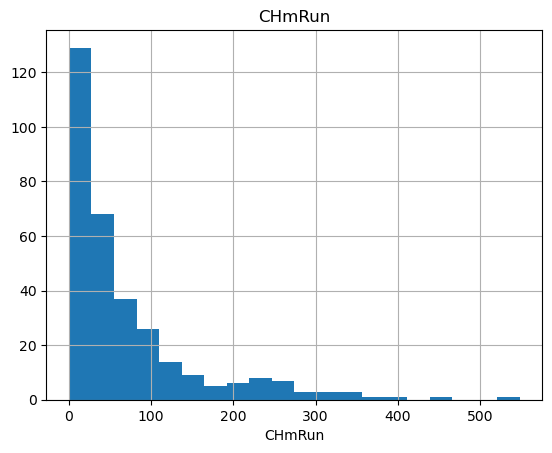

20*# CRuns 20*#
count    322.000
mean     358.795
std      334.106
min        1.000
1%         3.630
5%        27.000
10%       38.100
20%       80.400
30%      117.300
40%      181.000
50%      247.000
60%      333.000
70%      443.400
80%      627.200
90%      895.700
95%     1032.300
99%     1174.370
max     2165.000
Name: CRuns, dtype: float64


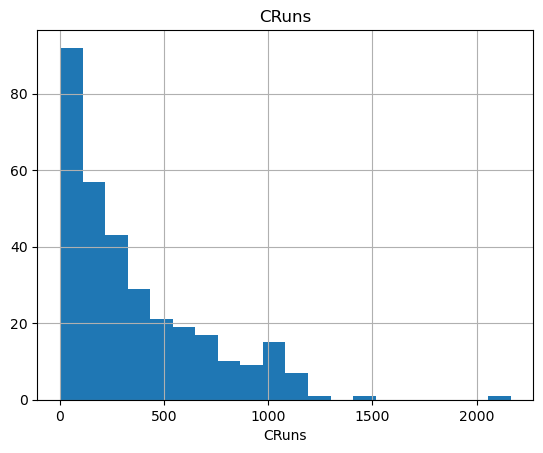

20*# CRBI 20*#
count    322.000
mean     330.118
std      333.220
min        0.000
1%         4.630
5%        22.050
10%       34.100
20%       70.200
30%      106.300
40%      149.000
50%      220.500
60%      303.600
70%      379.100
80%      496.200
90%      861.600
95%     1071.750
99%     1310.850
max     1659.000
Name: CRBI, dtype: float64


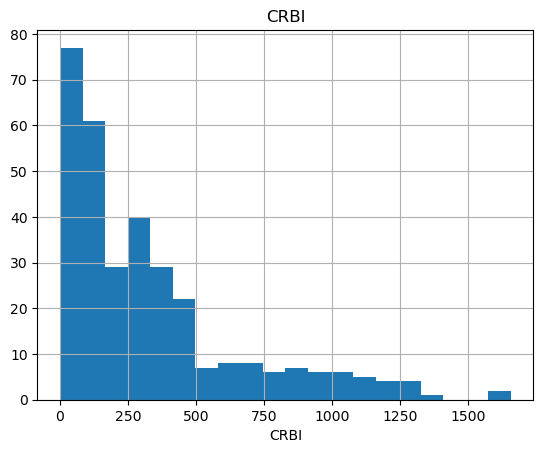

20*# CWalks 20*#
count    322.000
mean     260.239
std      267.058
min        0.000
1%         4.000
5%        15.050
10%       30.100
20%       55.000
30%       82.000
40%      117.400
50%      170.500
60%      226.600
70%      300.700
80%      421.000
90%      643.900
95%      817.600
99%     1139.140
max     1566.000
Name: CWalks, dtype: float64


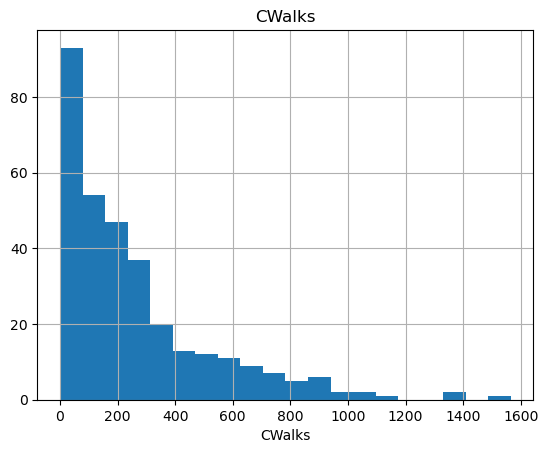

20*# PutOuts 20*#
count    322.000
mean     288.938
std      280.705
min        0.000
1%         0.000
5%        33.200
10%       62.200
20%       99.600
30%      132.000
40%      167.000
50%      212.000
60%      257.400
70%      303.000
80%      365.800
90%      685.600
95%      910.650
99%     1301.190
max     1378.000
Name: PutOuts, dtype: float64


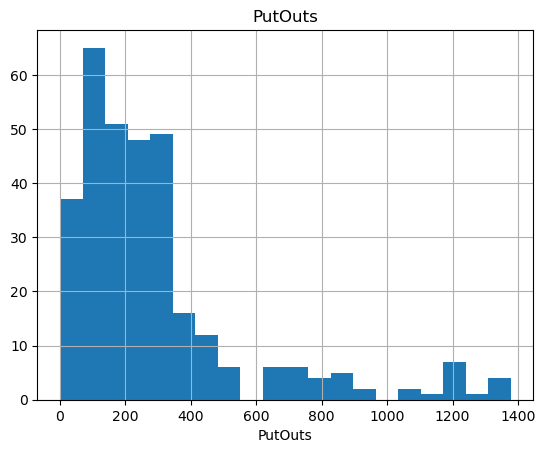

20*# Assists 20*#
count   322.000
mean    106.913
std     136.855
min       0.000
1%        0.000
5%        0.000
10%       2.000
20%       5.200
30%       9.000
40%      15.400
50%      39.500
60%      76.800
70%     134.800
80%     210.800
90%     353.300
95%     431.450
99%     478.160
max     492.000
Name: Assists, dtype: float64


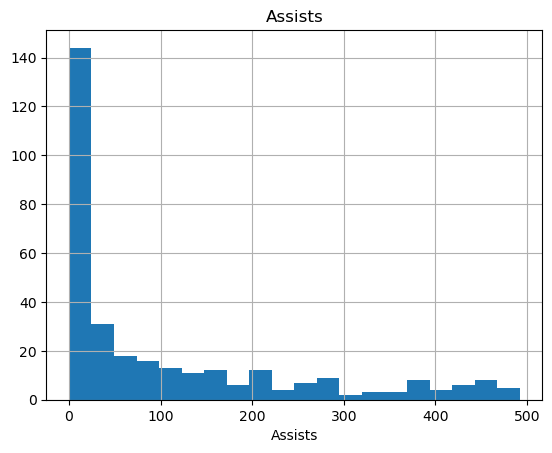

20*# Errors 20*#
count   322.000
mean      8.040
std       6.368
min       0.000
1%        0.000
5%        0.000
10%       1.000
20%       3.000
30%       4.000
40%       5.000
50%       6.000
60%       8.000
70%      10.000
80%      13.000
90%      17.000
95%      20.000
99%      25.790
max      32.000
Name: Errors, dtype: float64


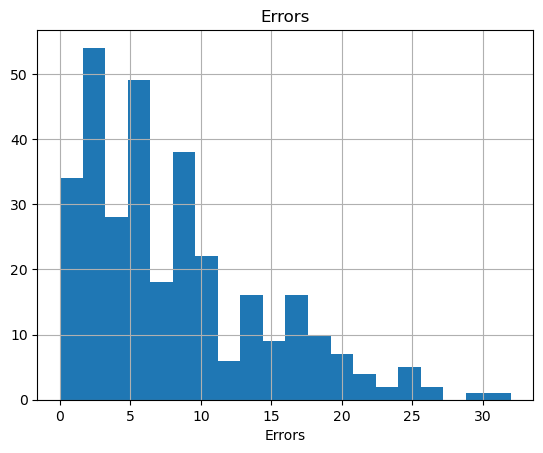

20*# Salary 20*#
count    263.000
mean     535.926
std      451.119
min       67.500
1%        70.000
5%        86.600
10%      100.000
20%      155.000
30%      221.000
40%      300.000
50%      425.000
60%      538.000
70%      700.000
80%      809.000
90%     1048.667
95%     1346.000
99%     2032.887
max     2460.000
Name: Salary, dtype: float64


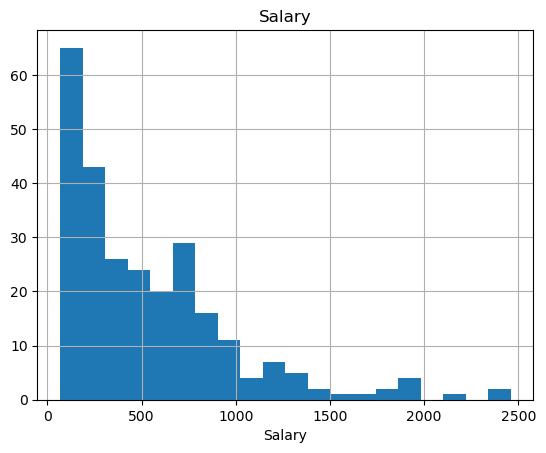

In [33]:
num_summary_df(df)

In [43]:
def plot_num_summary(dataframe):
    warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
    num_plots_len = len(num_cols)
    rows = math.ceil(num_plots_len/2)
    cols = 2 if num_plots_len > 1 else 1
    plt.figure(figsize=(10*cols, 4*rows))
    for index, col in enumerate(num_cols):
        plt.subplot(rows, cols, index+1)
        dataframe[col].hist(bins=20)
        plt.title(col)
    plt.tight_layout()
    plt.show()

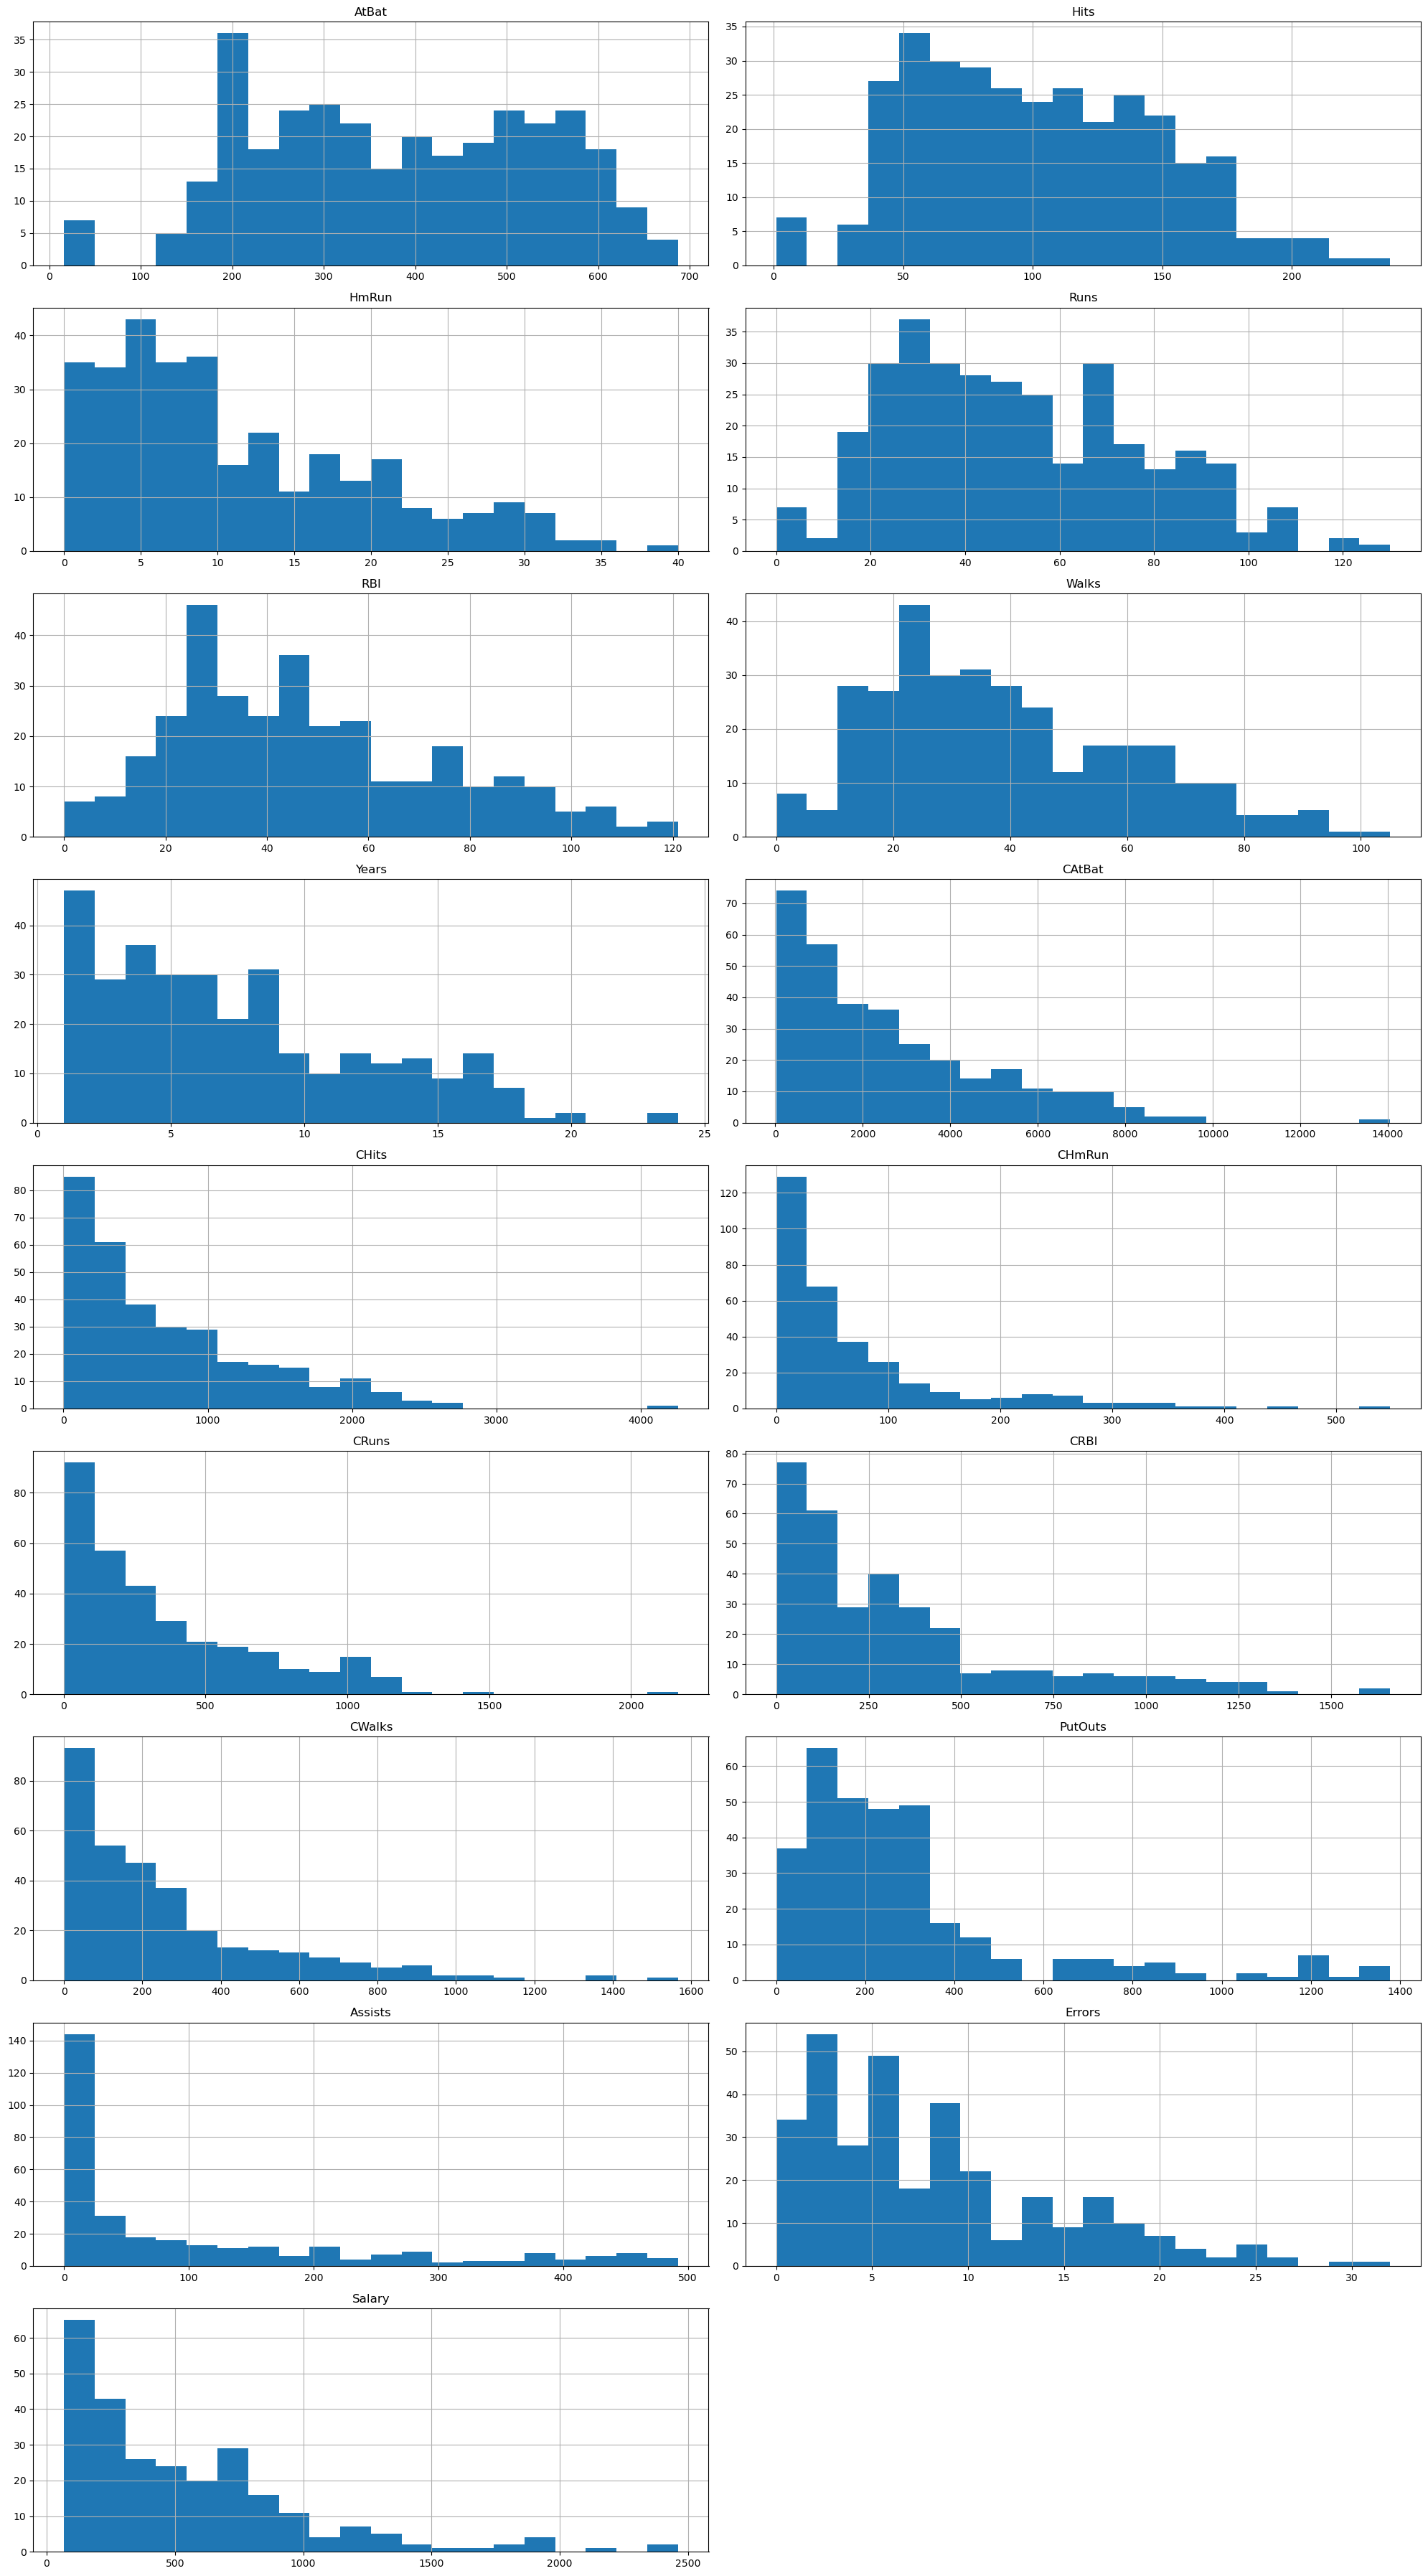

In [47]:
plot_num_summary(df)

## Target ==> Hedef

In [56]:
def target_summary_with_num(dataframe, target, numerical_col):
     print(20*"#", target, "==>", numerical_col, 20*"#")
     print(pd.DataFrame({"Target Mean": dataframe.groupby(target)[numerical_col].mean()}))

In [58]:
target_summary_with_num(df, "NewLeague" ,"Salary")

#################### NewLeague ==> Salary ####################
           Target Mean
NewLeague             
A              537.113
N              534.554


In [192]:
def target_summary_with_num_df(dataframe, target):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
    for col in num_cols:
        target_summary_with_num(dataframe, target, col)

In [200]:
target_summary_with_num_df(df, "NewLeague")

#################### NewLeague ==> AtBat ####################
           Target Mean
NewLeague             
A              388.972
N              371.233
#################### NewLeague ==> Hits ####################
           Target Mean
NewLeague             
A              103.585
N               97.938
#################### NewLeague ==> HmRun ####################
           Target Mean
NewLeague             
A               12.085
N                9.185
#################### NewLeague ==> Runs ####################
           Target Mean
NewLeague             
A               53.642
N               47.616
#################### NewLeague ==> RBI ####################
           Target Mean
NewLeague             
A               50.886
N               44.582
#################### NewLeague ==> Walks ####################
           Target Mean
NewLeague             
A               39.136
N               38.267
#################### NewLeague ==> Years ####################
           Target 

In [162]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(20*"#", target, "==>", categorical_col, 20*"#")
    print(pd.DataFrame({"Target Mean": dataframe.groupby(categorical_col)[target].mean()}))

In [170]:
def target_summary_with_cat_df(dataframe, target):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
    for col in cat_cols:
        target_summary_with_cat(dataframe, target, col)

In [196]:
target_summary_with_cat_df(df, "Salary")

#################### Salary ==> League ####################
        Target Mean
League             
A           542.000
N           529.118
#################### Salary ==> Division ####################
          Target Mean
Division             
E             624.271
W             450.877
#################### Salary ==> NewLeague ####################
           Target Mean
NewLeague             
A              537.113
N              534.554


## Correlation Analyis

In [228]:
def high_correlated_cols(dataframe, corr_th = 0.90, remove=False, plot=False):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
    corr = dataframe[num_cols].corr()
    corr_matrix = corr.abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if drop_list == []:
         print(20*"#", "After Correlation Analysis, You Don't Need to Remove Variables", 20*"#")
    if remove:
        dataframe = dataframe.drop(drop_list, axis=1)
    if plot:
        sns.set(rc={'figure.figsize': (18,13)})
        sns.heatmap(corr, cmap="RdBu", annot=True, fmt=".2f")
        plt.show(block=True)
    return drop_list


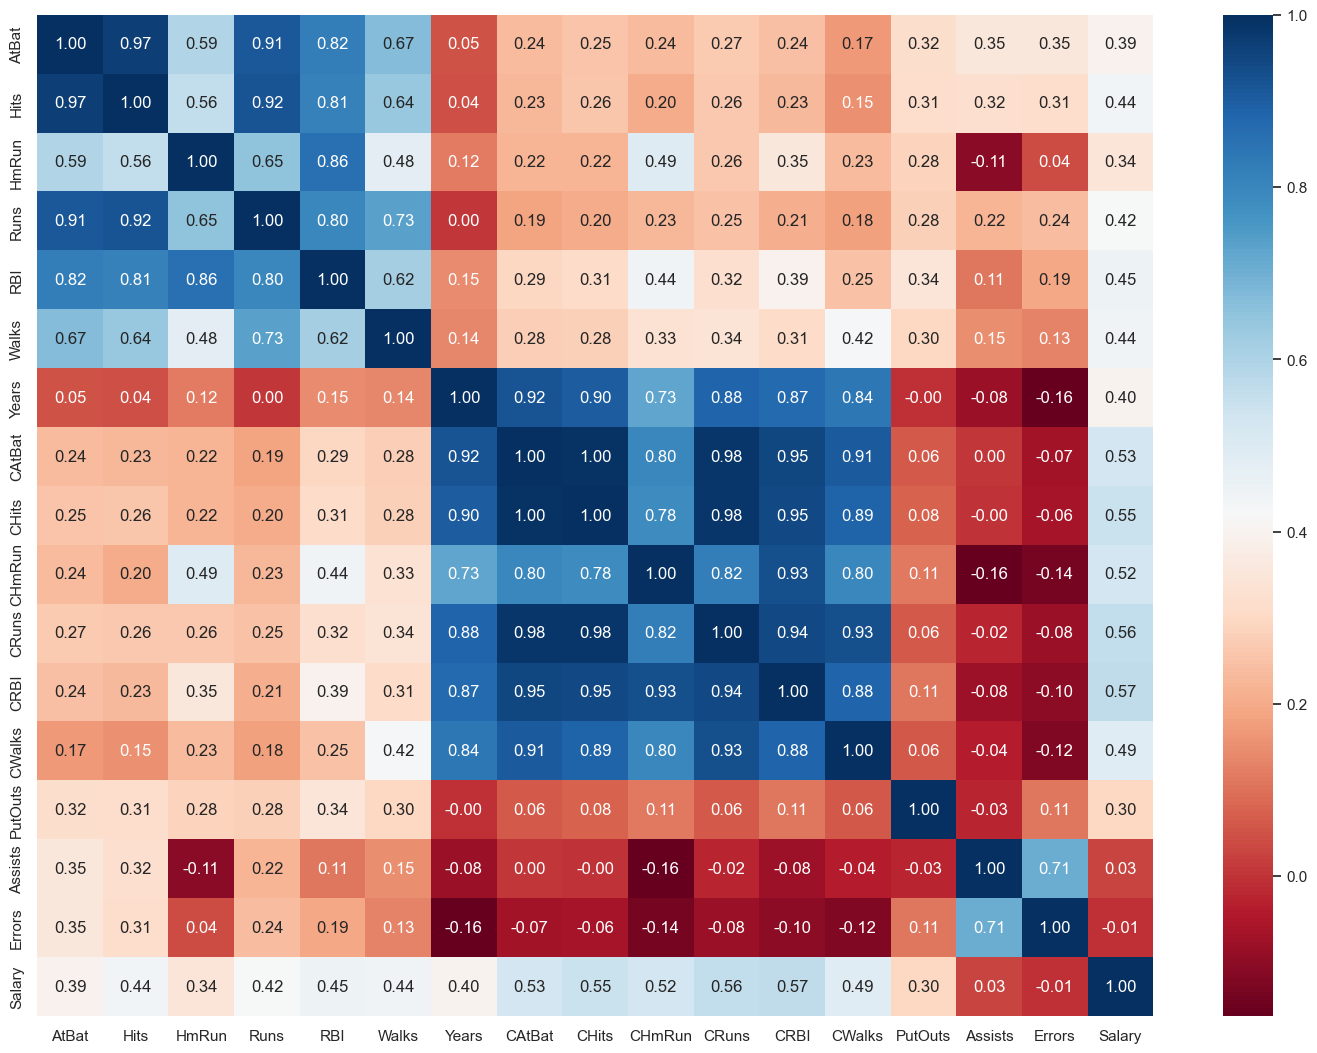

['Hits', 'Runs', 'CAtBat', 'CHits', 'CRuns', 'CRBI', 'CWalks']

In [230]:
high_correlated_cols(df, plot=True)

In [93]:
cat_cols, num_cols, num_but_cat, cat_but_car = grab_col_names(df)
df[num_cols].corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000,0.968,0.592,0.913,0.821,0.670,0.047,0.236,0.253,0.237,0.267,0.244,0.166,0.318,0.354,0.352,0.395
Hits,0.968,1.000,0.562,0.922,0.811,0.641,0.045,0.228,0.256,0.203,0.262,0.232,0.152,0.311,0.320,0.310,0.439
HmRun,0.592,0.562,1.000,0.651,0.855,0.481,0.116,0.222,0.221,0.493,0.262,0.352,0.233,0.283,-0.106,0.039,0.343
Runs,0.913,0.922,0.651,1.000,0.798,0.732,0.005,0.186,0.205,0.228,0.251,0.206,0.182,0.279,0.221,0.240,0.420
RBI,0.821,0.811,0.855,0.798,1.000,0.616,0.146,0.295,0.308,0.442,0.323,0.393,0.251,0.343,0.107,0.193,0.449
Walks,0.670,0.641,0.481,0.732,0.616,1.000,0.136,0.277,0.281,0.332,0.338,0.309,0.425,0.300,0.150,0.129,0.444
Years,0.047,0.045,0.116,0.005,0.146,0.136,1.000,0.920,0.904,0.727,0.883,0.869,0.839,-0.005,-0.081,-0.162,0.401
CAtBat,0.236,0.228,0.222,0.186,0.295,0.277,0.920,1.000,0.995,0.799,0.983,0.949,0.907,0.062,0.002,-0.067,0.526
CHits,0.253,0.256,0.221,0.205,0.308,0.281,0.904,0.995,1.000,0.783,0.985,0.945,0.891,0.077,-0.003,-0.063,0.549
CHmRun,0.237,0.203,0.493,0.228,0.442,0.332,0.727,0.799,0.783,1.000,0.820,0.929,0.800,0.113,-0.159,-0.138,0.525


In [137]:
upper_triangle_matrix = df[num_cols].corr().where(np.triu(np.ones(df[num_cols].corr().shape), k=1).astype(bool))
print(upper_triangle_matrix)

         AtBat  Hits  HmRun  Runs   RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  CRBI  CWalks  PutOuts  Assists  Errors  Salary
AtBat      NaN 0.968  0.592 0.913 0.821  0.670  0.047   0.236  0.253   0.237  0.267 0.244   0.166    0.318    0.354   0.352   0.395
Hits       NaN   NaN  0.562 0.922 0.811  0.641  0.045   0.228  0.256   0.203  0.262 0.232   0.152    0.311    0.320   0.310   0.439
HmRun      NaN   NaN    NaN 0.651 0.855  0.481  0.116   0.222  0.221   0.493  0.262 0.352   0.233    0.283   -0.106   0.039   0.343
Runs       NaN   NaN    NaN   NaN 0.798  0.732  0.005   0.186  0.205   0.228  0.251 0.206   0.182    0.279    0.221   0.240   0.420
RBI        NaN   NaN    NaN   NaN   NaN  0.616  0.146   0.295  0.308   0.442  0.323 0.393   0.251    0.343    0.107   0.193   0.449
Walks      NaN   NaN    NaN   NaN   NaN    NaN  0.136   0.277  0.281   0.332  0.338 0.309   0.425    0.300    0.150   0.129   0.444
Years      NaN   NaN    NaN   NaN   NaN    NaN    NaN   0.920  0.904   0.727

In [121]:
cat_cols, num_cols, num_but_cat, cat_but_car = grab_col_names(df)
np.ones(df[num_cols].corr().shape)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [123]:
df[num_cols].corr().shape

(17, 17)

In [125]:
np.triu(np.ones(df[num_cols].corr().shape))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1

In [133]:
df[num_cols].corr().where(np.triu(np.ones(df[num_cols].corr().shape), k=1).astype(bool))

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,NaN,0.968,0.592,0.913,0.821,0.670,0.047,0.236,0.253,0.237,0.267,0.244,0.166,0.318,0.354,0.352,0.395
Hits,NaN,NaN,0.562,0.922,0.811,0.641,0.045,0.228,0.256,0.203,0.262,0.232,0.152,0.311,0.320,0.310,0.439
HmRun,NaN,NaN,NaN,0.651,0.855,0.481,0.116,0.222,0.221,0.493,0.262,0.352,0.233,0.283,-0.106,0.039,0.343
Runs,NaN,NaN,NaN,NaN,0.798,0.732,0.005,0.186,0.205,0.228,0.251,0.206,0.182,0.279,0.221,0.240,0.420
RBI,NaN,NaN,NaN,NaN,NaN,0.616,0.146,0.295,0.308,0.442,0.323,0.393,0.251,0.343,0.107,0.193,0.449
Walks,NaN,NaN,NaN,NaN,NaN,NaN,0.136,0.277,0.281,0.332,0.338,0.309,0.425,0.300,0.150,0.129,0.444
Years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.920,0.904,0.727,0.883,0.869,0.839,-0.005,-0.081,-0.162,0.401
CAtBat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.995,0.799,0.983,0.949,0.907,0.062,0.002,-0.067,0.526
CHits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.783,0.985,0.945,0.891,0.077,-0.003,-0.063,0.549
CHmRun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.820,0.929,0.800,0.113,-0.159,-0.138,0.525


# General Anaylsis - Pipline

In [206]:
def load_dataset(path):
    df = pd.read_csv(path)
    return df

In [222]:
def main(path_dataset, target):
    df = load_dataset(path_dataset)
    print(20*"#", "General Information", 20*"#")
    check_df(df)
    print(20*"#", "Analysis of Categorical and Numerical Variables", 20*"#")
    grab_col_names(df, cat_th = 10, car_th=20, report=False)
    cat_summary_df(df)
    num_summary_df(df, plot=False)
    print(20*"#", "Target Analysis", 20*"#")
    if len(num_cols) > 1:
        target_summary_with_num_df(df,target)
    if len(cat_cols) > 1:
        target_summary_with_cat_df(df, target)
    
    print(20*"#", "Correlation Analysis", 20*"#")
    drop_list = high_correlated_cols(df, remove = True, plot=True)
    print(20*"#", "Plot All Numerical Variables", 20*"#")
    plot_num_summary(df)


#################### General Information ####################
#################### Head ####################
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague
0    293    66      1    30   29     14      1     293     66       1     30    29      14      A        E      446       33      20     NaN         A
1    315    81      7    24   38     39     14    3449    835      69    321   414     375      N        W      632       43      10 475.000         N
2    479   130     18    66   72     76      3    1624    457      63    224   266     263      A        W      880       82      14 480.000         A
3    496   141     20    65   78     37     11    5628   1575     225    828   838     354      N        E      200       11       3 500.000         N
4    321    87     10    39   42     30      2     396    101      12     48    46      33      N        E      805       40       4  91

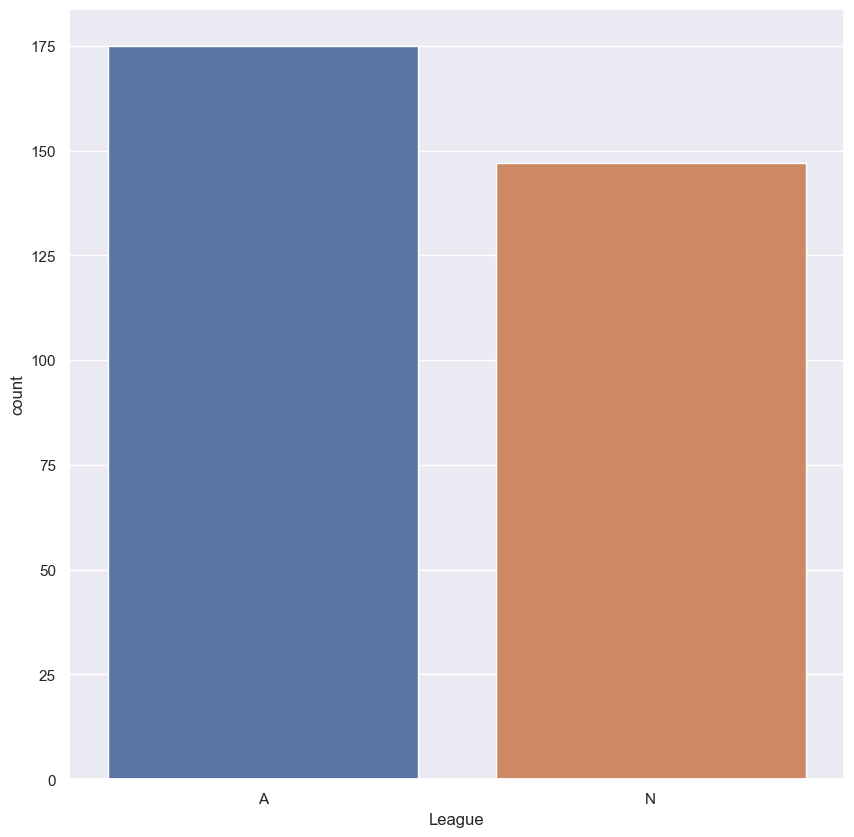

#################### Division ####################


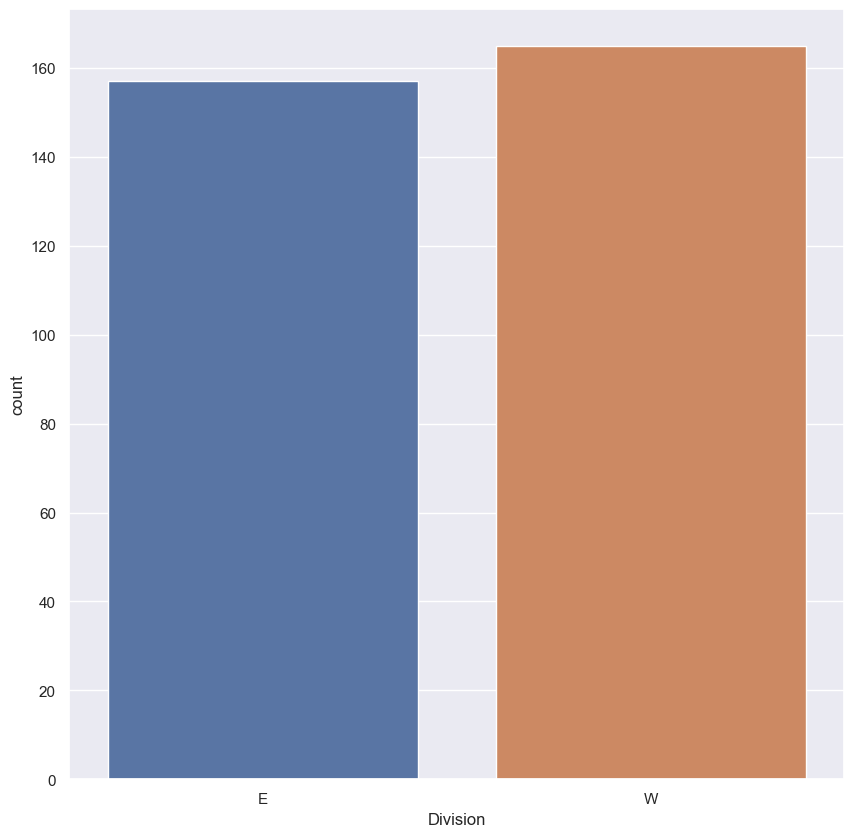

#################### NewLeague ####################


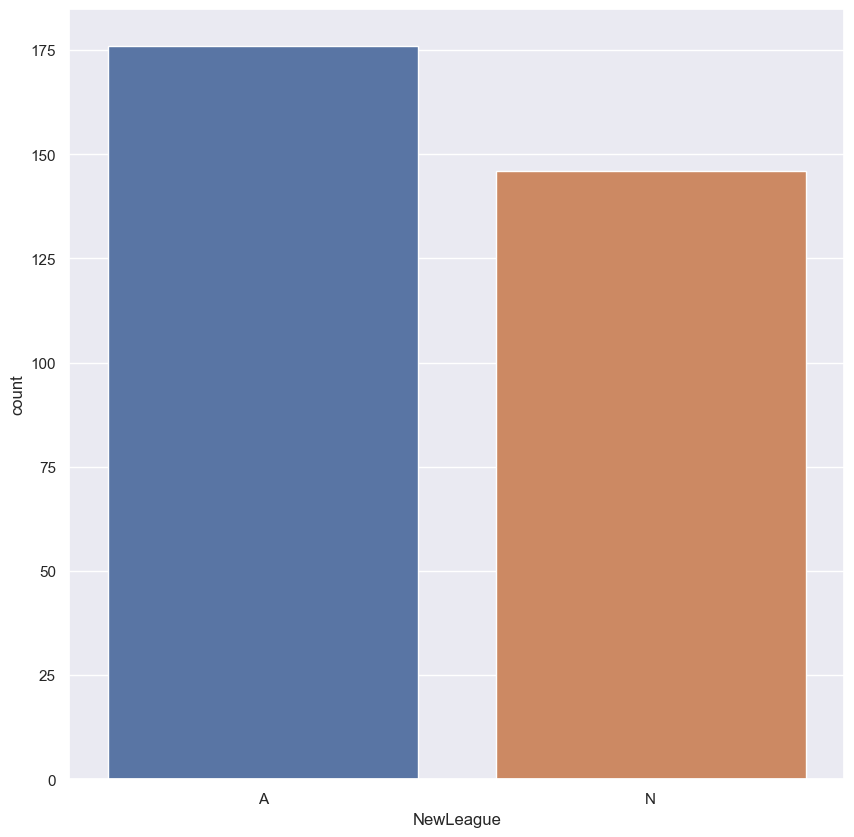

20*# AtBat 20*#
count   322.000
mean    380.929
std     153.405
min      16.000
1%       20.420
5%      161.000
10%     194.100
20%     221.800
30%     281.300
40%     321.800
50%     379.500
60%     430.200
70%     490.000
80%     535.600
90%     584.900
95%     609.900
99%     658.590
max     687.000
Name: AtBat, dtype: float64


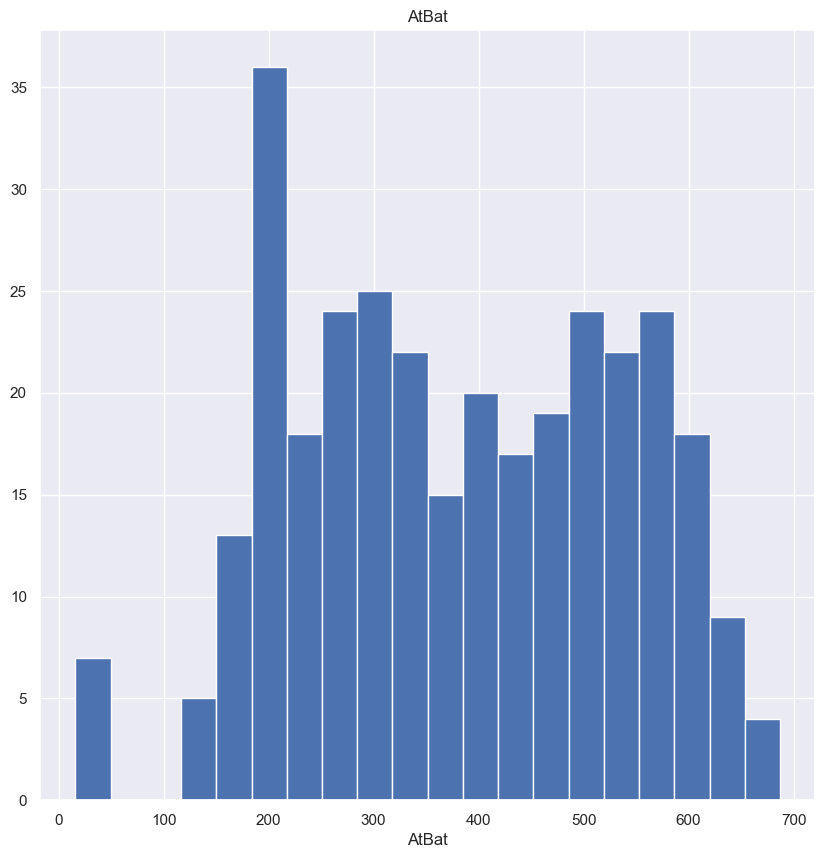

20*# Hits 20*#
count   322.000
mean    101.025
std      46.455
min       1.000
1%        4.420
5%       39.000
10%      45.100
20%      57.000
30%      70.000
40%      82.000
50%      96.000
60%     113.000
70%     128.700
80%     144.000
90%     163.000
95%     174.000
99%     210.790
max     238.000
Name: Hits, dtype: float64


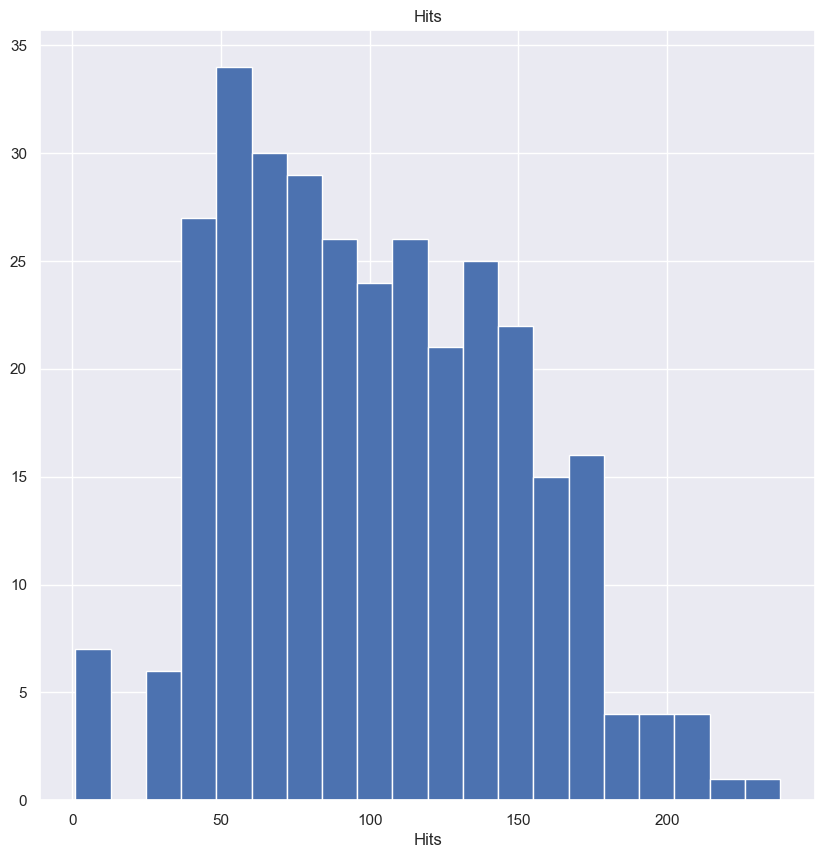

20*# HmRun 20*#
count   322.000
mean     10.770
std       8.709
min       0.000
1%        0.000
5%        0.000
10%       1.000
20%       3.000
30%       5.000
40%       6.000
50%       8.000
60%      10.600
70%      14.000
80%      18.000
90%      24.000
95%      28.950
99%      33.000
max      40.000
Name: HmRun, dtype: float64


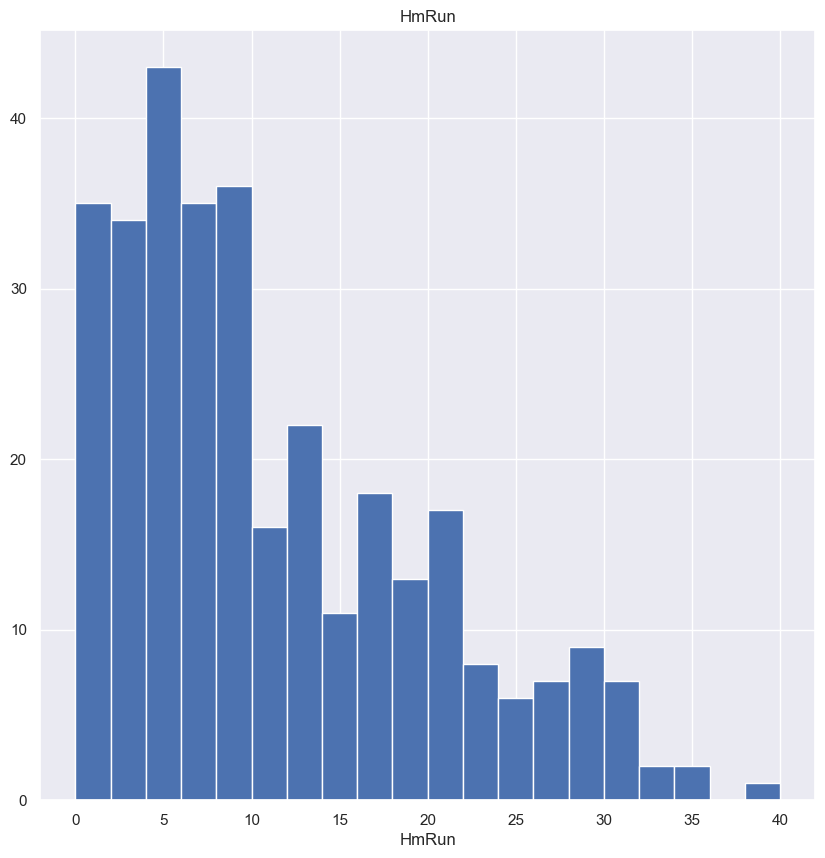

20*# Runs 20*#
count   322.000
mean     50.910
std      26.024
min       0.000
1%        1.210
5%       17.000
10%      20.100
20%      27.000
30%      33.000
40%      41.000
50%      48.000
60%      55.600
70%      66.000
80%      75.800
90%      89.000
95%      94.000
99%     107.790
max     130.000
Name: Runs, dtype: float64


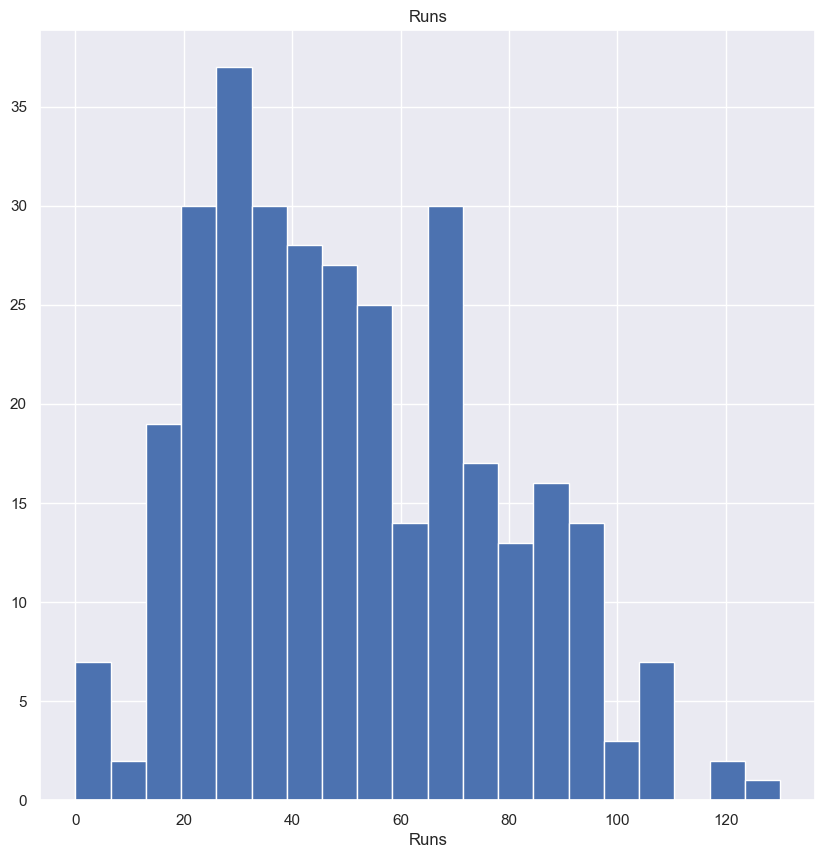

20*# RBI 20*#
count   322.000
mean     48.028
std      26.167
min       0.000
1%        2.000
5%       14.000
10%      19.000
20%      26.000
30%      30.000
40%      36.400
50%      44.000
60%      49.000
70%      58.000
80%      73.000
90%      86.000
95%      96.000
99%     112.370
max     121.000
Name: RBI, dtype: float64


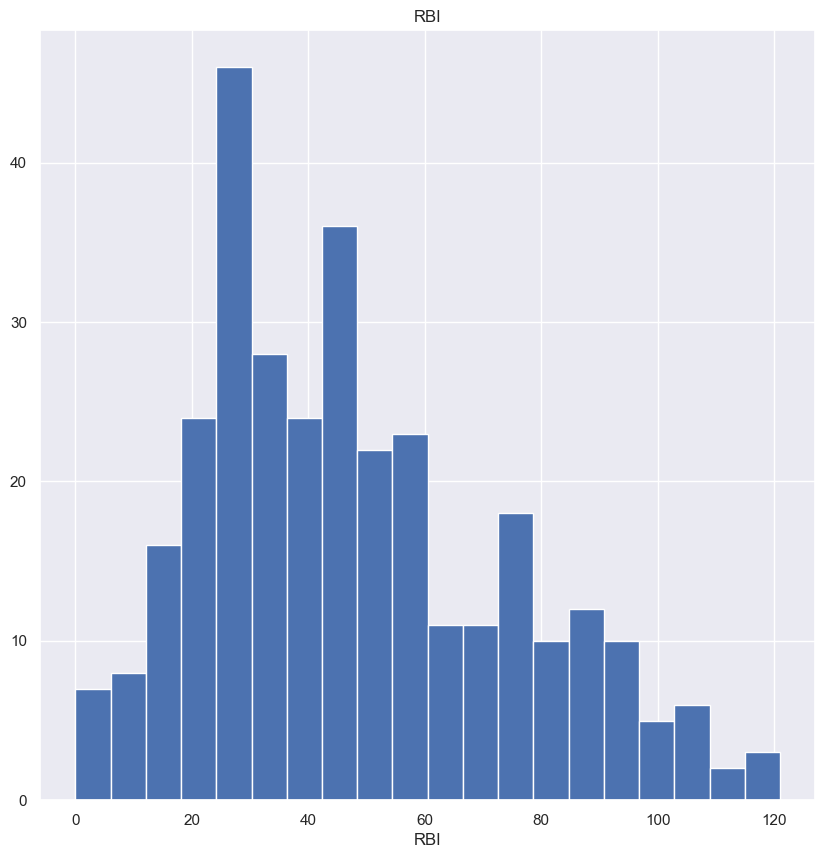

20*# Walks 20*#
count   322.000
mean     38.742
std      21.639
min       0.000
1%        1.000
5%       11.050
10%      15.000
20%      20.000
30%      24.000
40%      30.000
50%      35.000
60%      40.000
70%      48.700
80%      59.000
90%      69.900
95%      78.000
99%      93.580
max     105.000
Name: Walks, dtype: float64


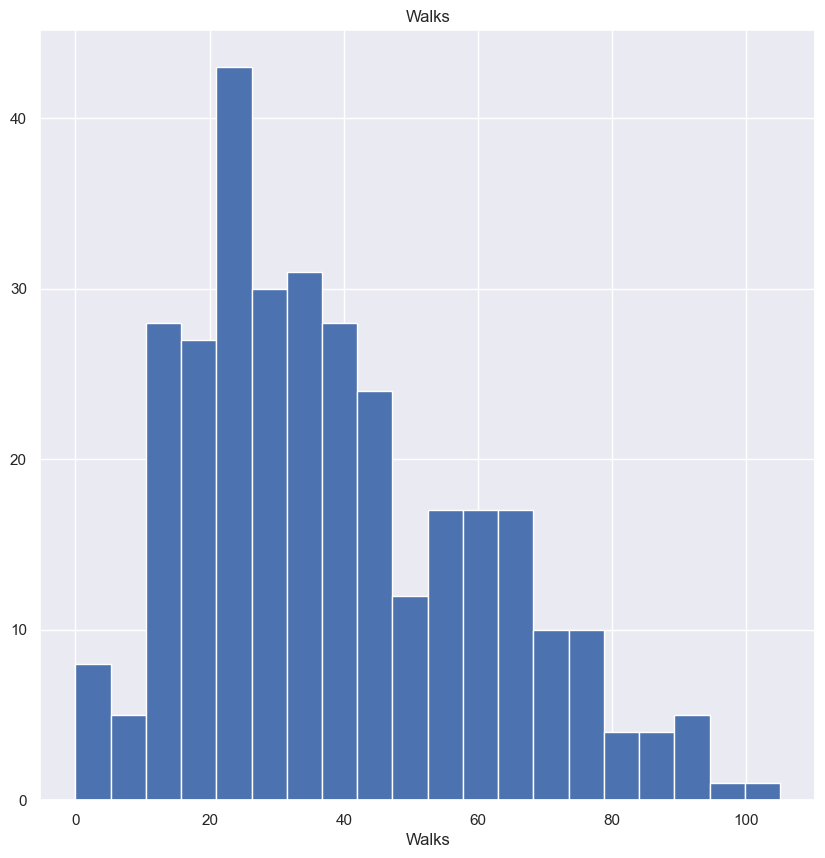

20*# Years 20*#
count   322.000
mean      7.444
std       4.926
min       1.000
1%        1.000
5%        1.000
10%       2.000
20%       3.000
30%       4.000
40%       5.000
50%       6.000
60%       7.600
70%      10.000
80%      12.000
90%      15.000
95%      17.000
99%      19.790
max      24.000
Name: Years, dtype: float64


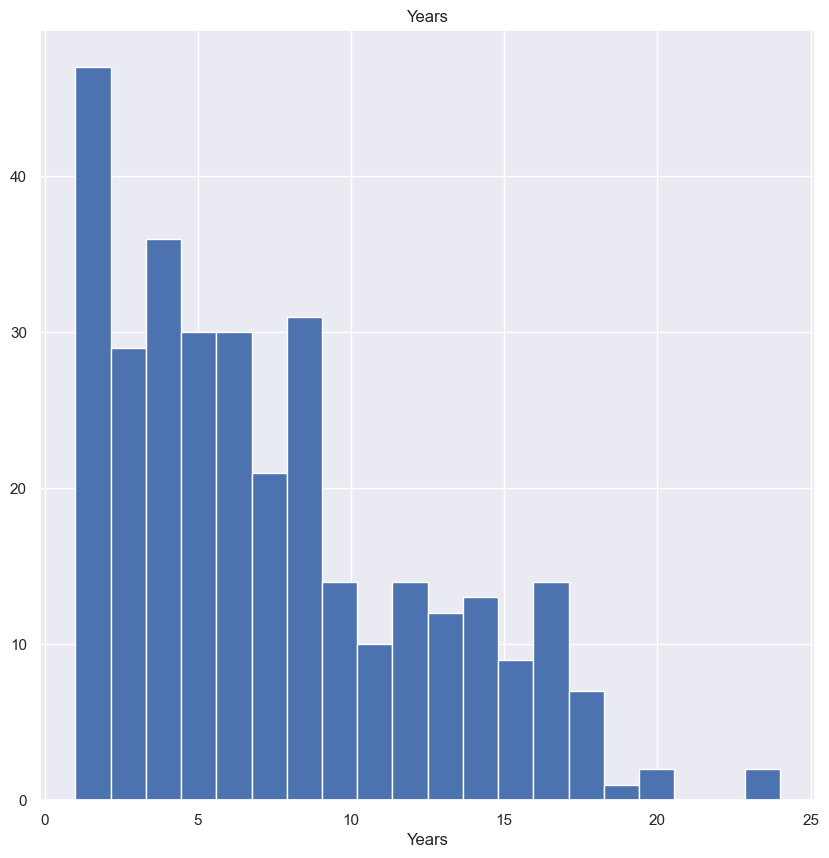

20*# CAtBat 20*#
count     322.000
mean     2648.683
std      2324.206
min        19.000
1%         41.000
5%        216.500
10%       342.200
20%       667.600
30%       963.400
40%      1402.200
50%      1928.000
60%      2654.000
70%      3365.000
80%      4483.000
90%      6123.400
95%      7125.600
99%      8749.970
max     14053.000
Name: CAtBat, dtype: float64


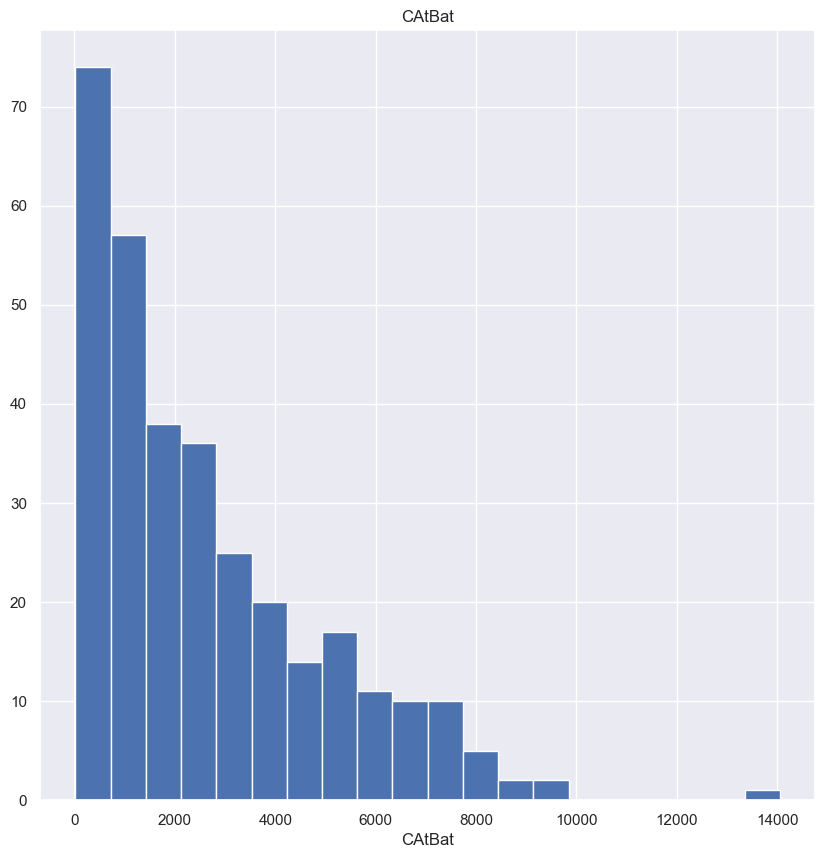

20*# CHits 20*#
count    322.000
mean     717.571
std      654.473
min        4.000
1%         9.840
5%        54.000
10%       86.000
20%      164.600
30%      238.000
40%      355.800
50%      508.000
60%      708.200
70%      911.100
80%     1229.200
90%     1659.600
95%     2017.150
99%     2500.340
max     4256.000
Name: CHits, dtype: float64


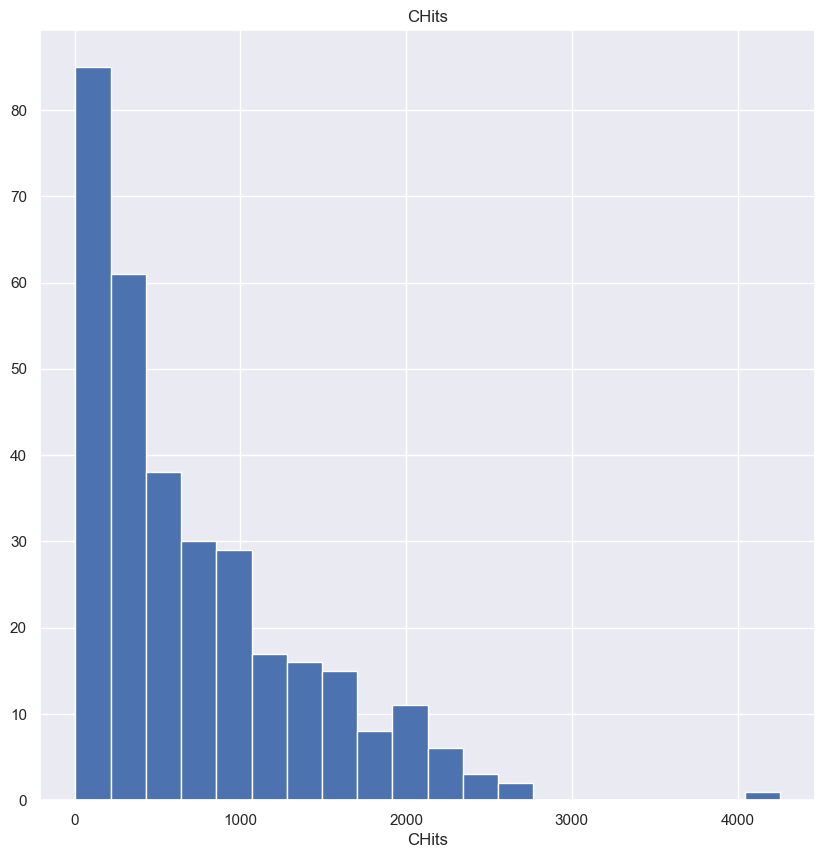

20*# CHmRun 20*#
count   322.000
mean     69.491
std      86.266
min       0.000
1%        0.000
5%        2.000
10%       4.000
20%      10.200
30%      16.300
40%      27.400
50%      37.500
60%      51.200
70%      72.400
80%     103.800
90%     194.900
95%     265.650
99%     373.120
max     548.000
Name: CHmRun, dtype: float64


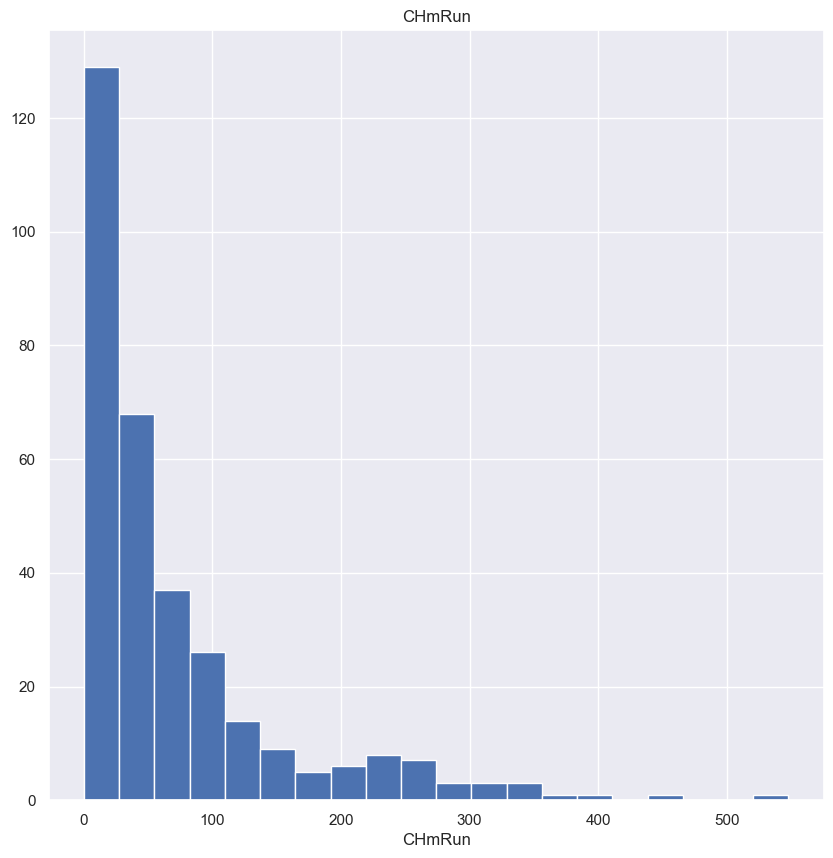

20*# CRuns 20*#
count    322.000
mean     358.795
std      334.106
min        1.000
1%         3.630
5%        27.000
10%       38.100
20%       80.400
30%      117.300
40%      181.000
50%      247.000
60%      333.000
70%      443.400
80%      627.200
90%      895.700
95%     1032.300
99%     1174.370
max     2165.000
Name: CRuns, dtype: float64


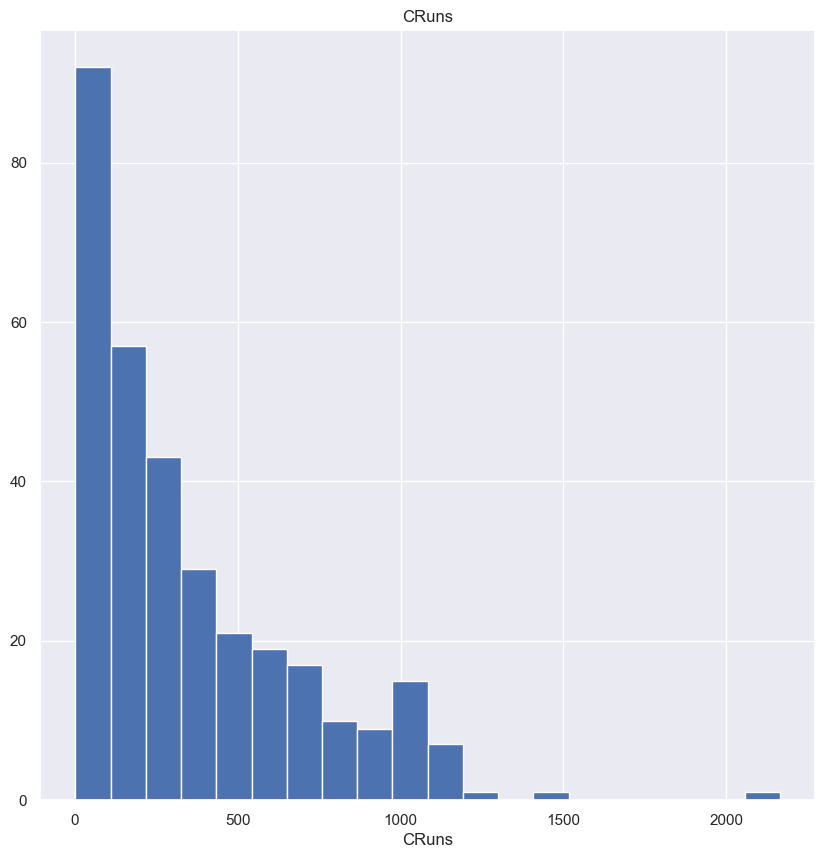

20*# CRBI 20*#
count    322.000
mean     330.118
std      333.220
min        0.000
1%         4.630
5%        22.050
10%       34.100
20%       70.200
30%      106.300
40%      149.000
50%      220.500
60%      303.600
70%      379.100
80%      496.200
90%      861.600
95%     1071.750
99%     1310.850
max     1659.000
Name: CRBI, dtype: float64


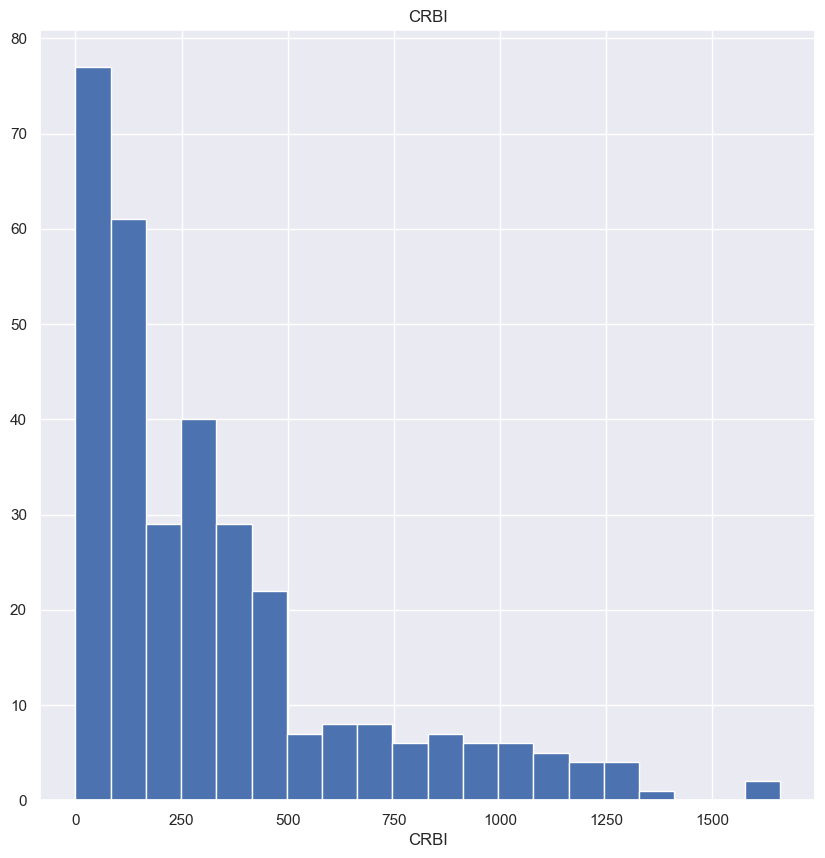

20*# CWalks 20*#
count    322.000
mean     260.239
std      267.058
min        0.000
1%         4.000
5%        15.050
10%       30.100
20%       55.000
30%       82.000
40%      117.400
50%      170.500
60%      226.600
70%      300.700
80%      421.000
90%      643.900
95%      817.600
99%     1139.140
max     1566.000
Name: CWalks, dtype: float64


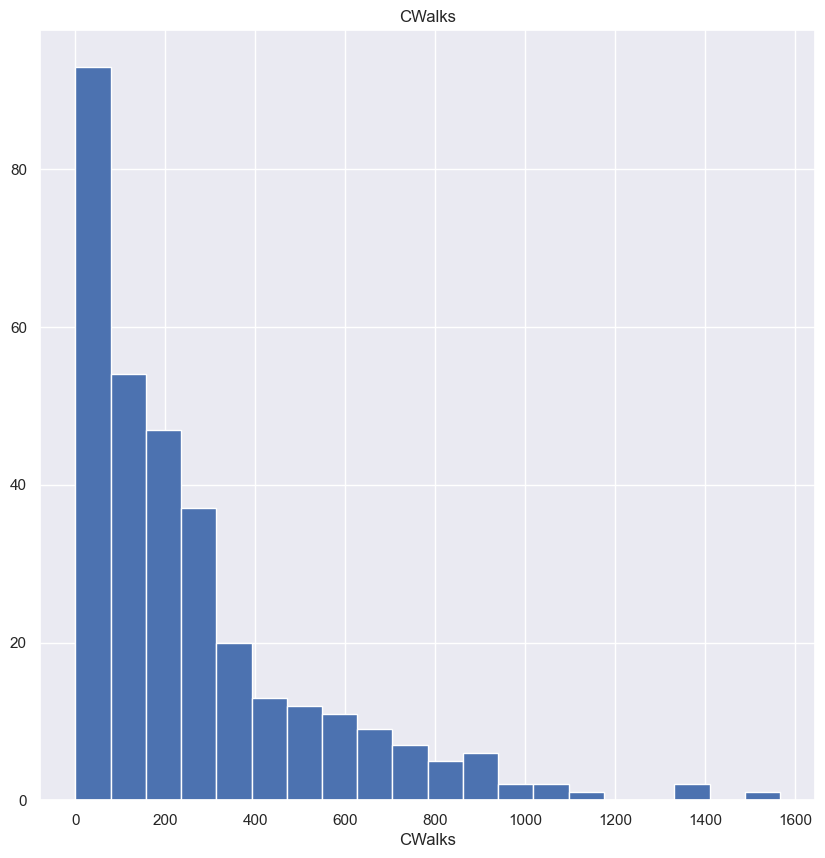

20*# PutOuts 20*#
count    322.000
mean     288.938
std      280.705
min        0.000
1%         0.000
5%        33.200
10%       62.200
20%       99.600
30%      132.000
40%      167.000
50%      212.000
60%      257.400
70%      303.000
80%      365.800
90%      685.600
95%      910.650
99%     1301.190
max     1378.000
Name: PutOuts, dtype: float64


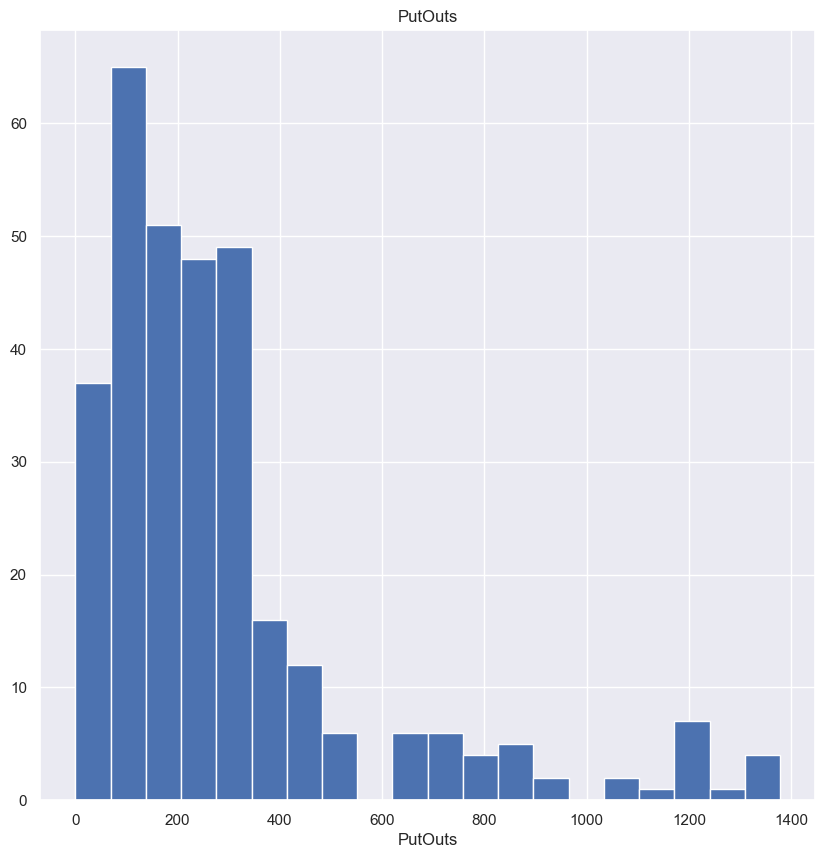

20*# Assists 20*#
count   322.000
mean    106.913
std     136.855
min       0.000
1%        0.000
5%        0.000
10%       2.000
20%       5.200
30%       9.000
40%      15.400
50%      39.500
60%      76.800
70%     134.800
80%     210.800
90%     353.300
95%     431.450
99%     478.160
max     492.000
Name: Assists, dtype: float64


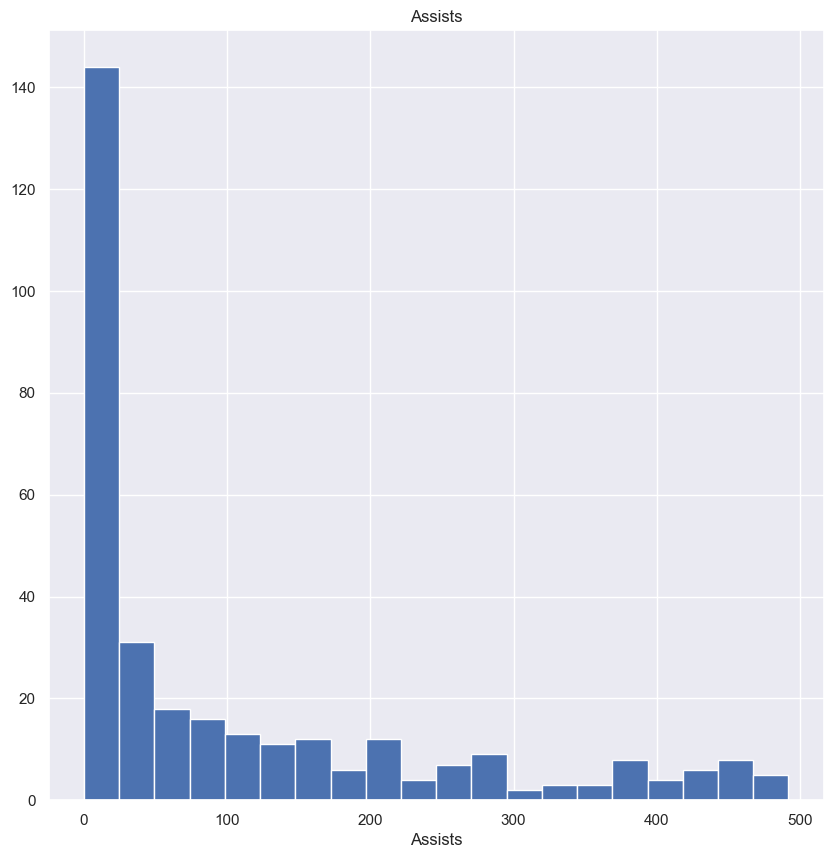

20*# Errors 20*#
count   322.000
mean      8.040
std       6.368
min       0.000
1%        0.000
5%        0.000
10%       1.000
20%       3.000
30%       4.000
40%       5.000
50%       6.000
60%       8.000
70%      10.000
80%      13.000
90%      17.000
95%      20.000
99%      25.790
max      32.000
Name: Errors, dtype: float64


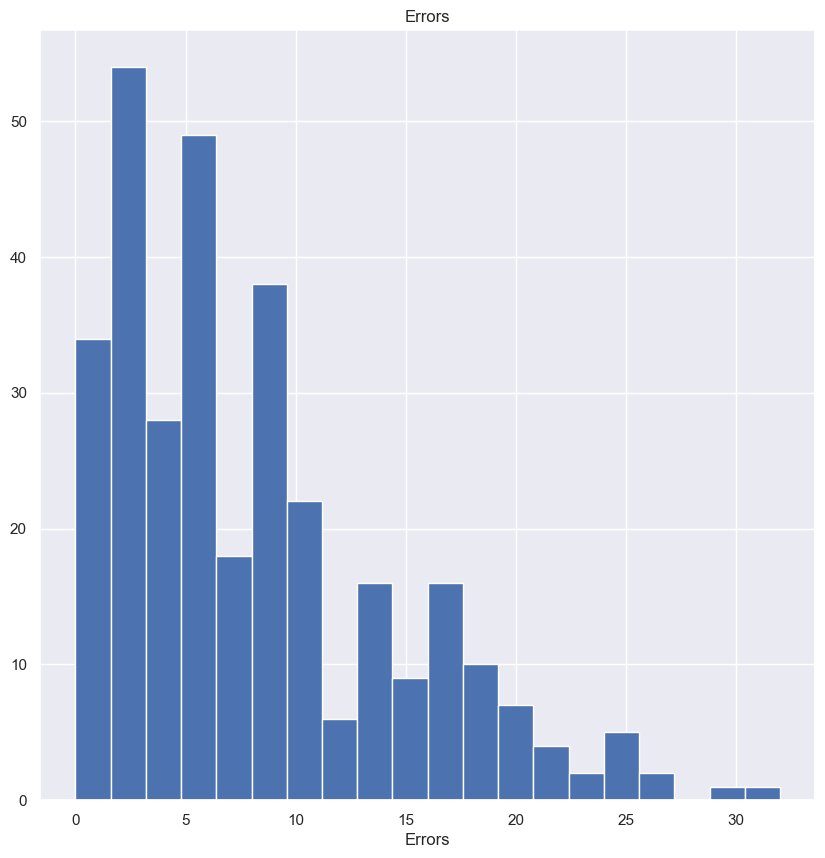

20*# Salary 20*#
count    263.000
mean     535.926
std      451.119
min       67.500
1%        70.000
5%        86.600
10%      100.000
20%      155.000
30%      221.000
40%      300.000
50%      425.000
60%      538.000
70%      700.000
80%      809.000
90%     1048.667
95%     1346.000
99%     2032.887
max     2460.000
Name: Salary, dtype: float64


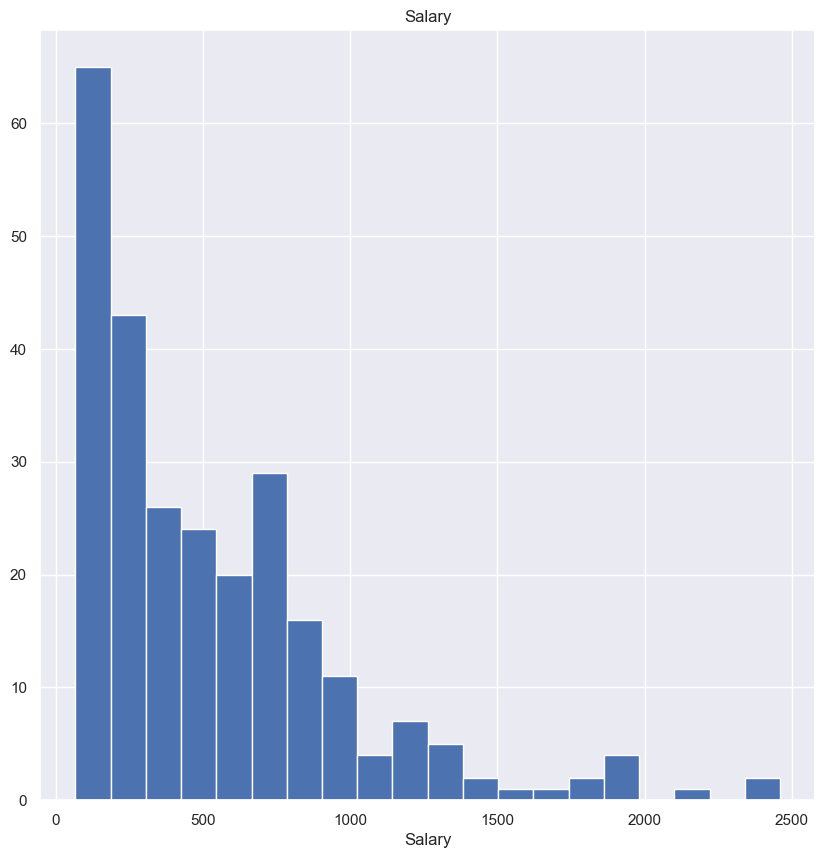

#################### Target Analysis ####################
#################### Salary ==> AtBat ####################
          Target Mean
Salary               
67.500        181.000
68.000        209.000
70.000        248.600
75.000        236.400
80.000        399.000
86.500        181.000
87.500        445.000
90.000        321.833
91.500        321.000
95.000        151.000
97.500        382.000
100.000       384.167
105.000       487.000
110.000       323.000
115.000       426.000
120.000       309.500
125.000       328.000
130.000       309.000
135.000       294.000
137.000       258.000
140.000       352.000
145.000       424.500
150.000       423.000
155.000       456.000
160.000       589.000
165.000       596.500
172.000       540.000
175.000       346.000
180.000       217.000
185.000       520.000
190.000       181.000
191.000       275.000
195.000       453.000
200.000       516.000
202.500       431.000
210.000       463.500
215.000       485.333
225.000       249.500
230

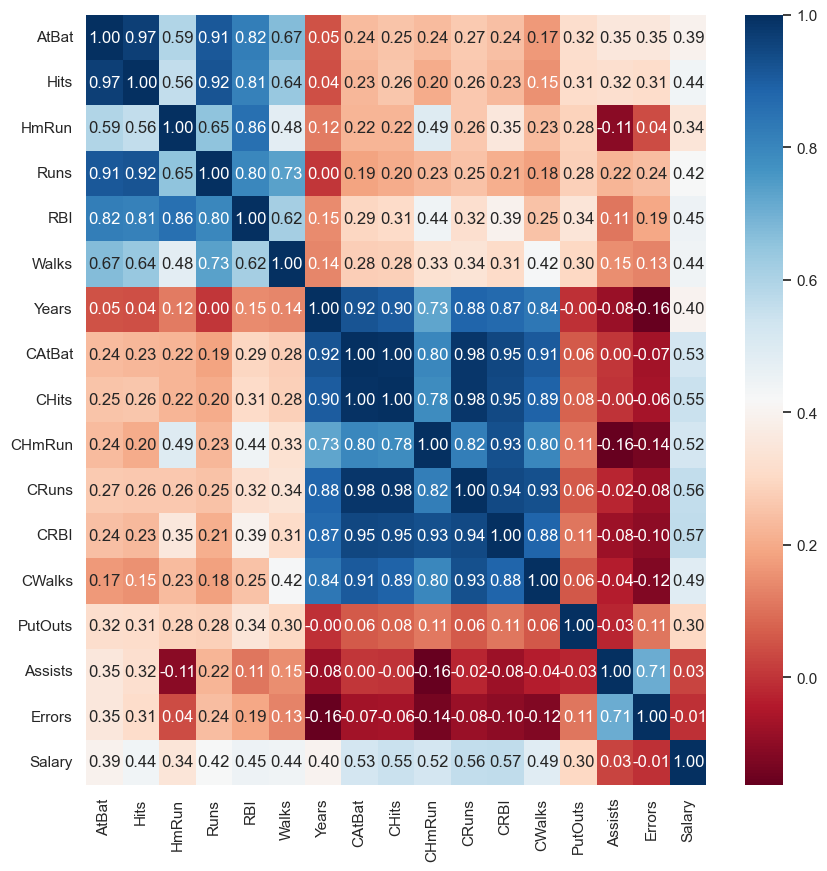

#################### Plot All Numerical Variables ####################


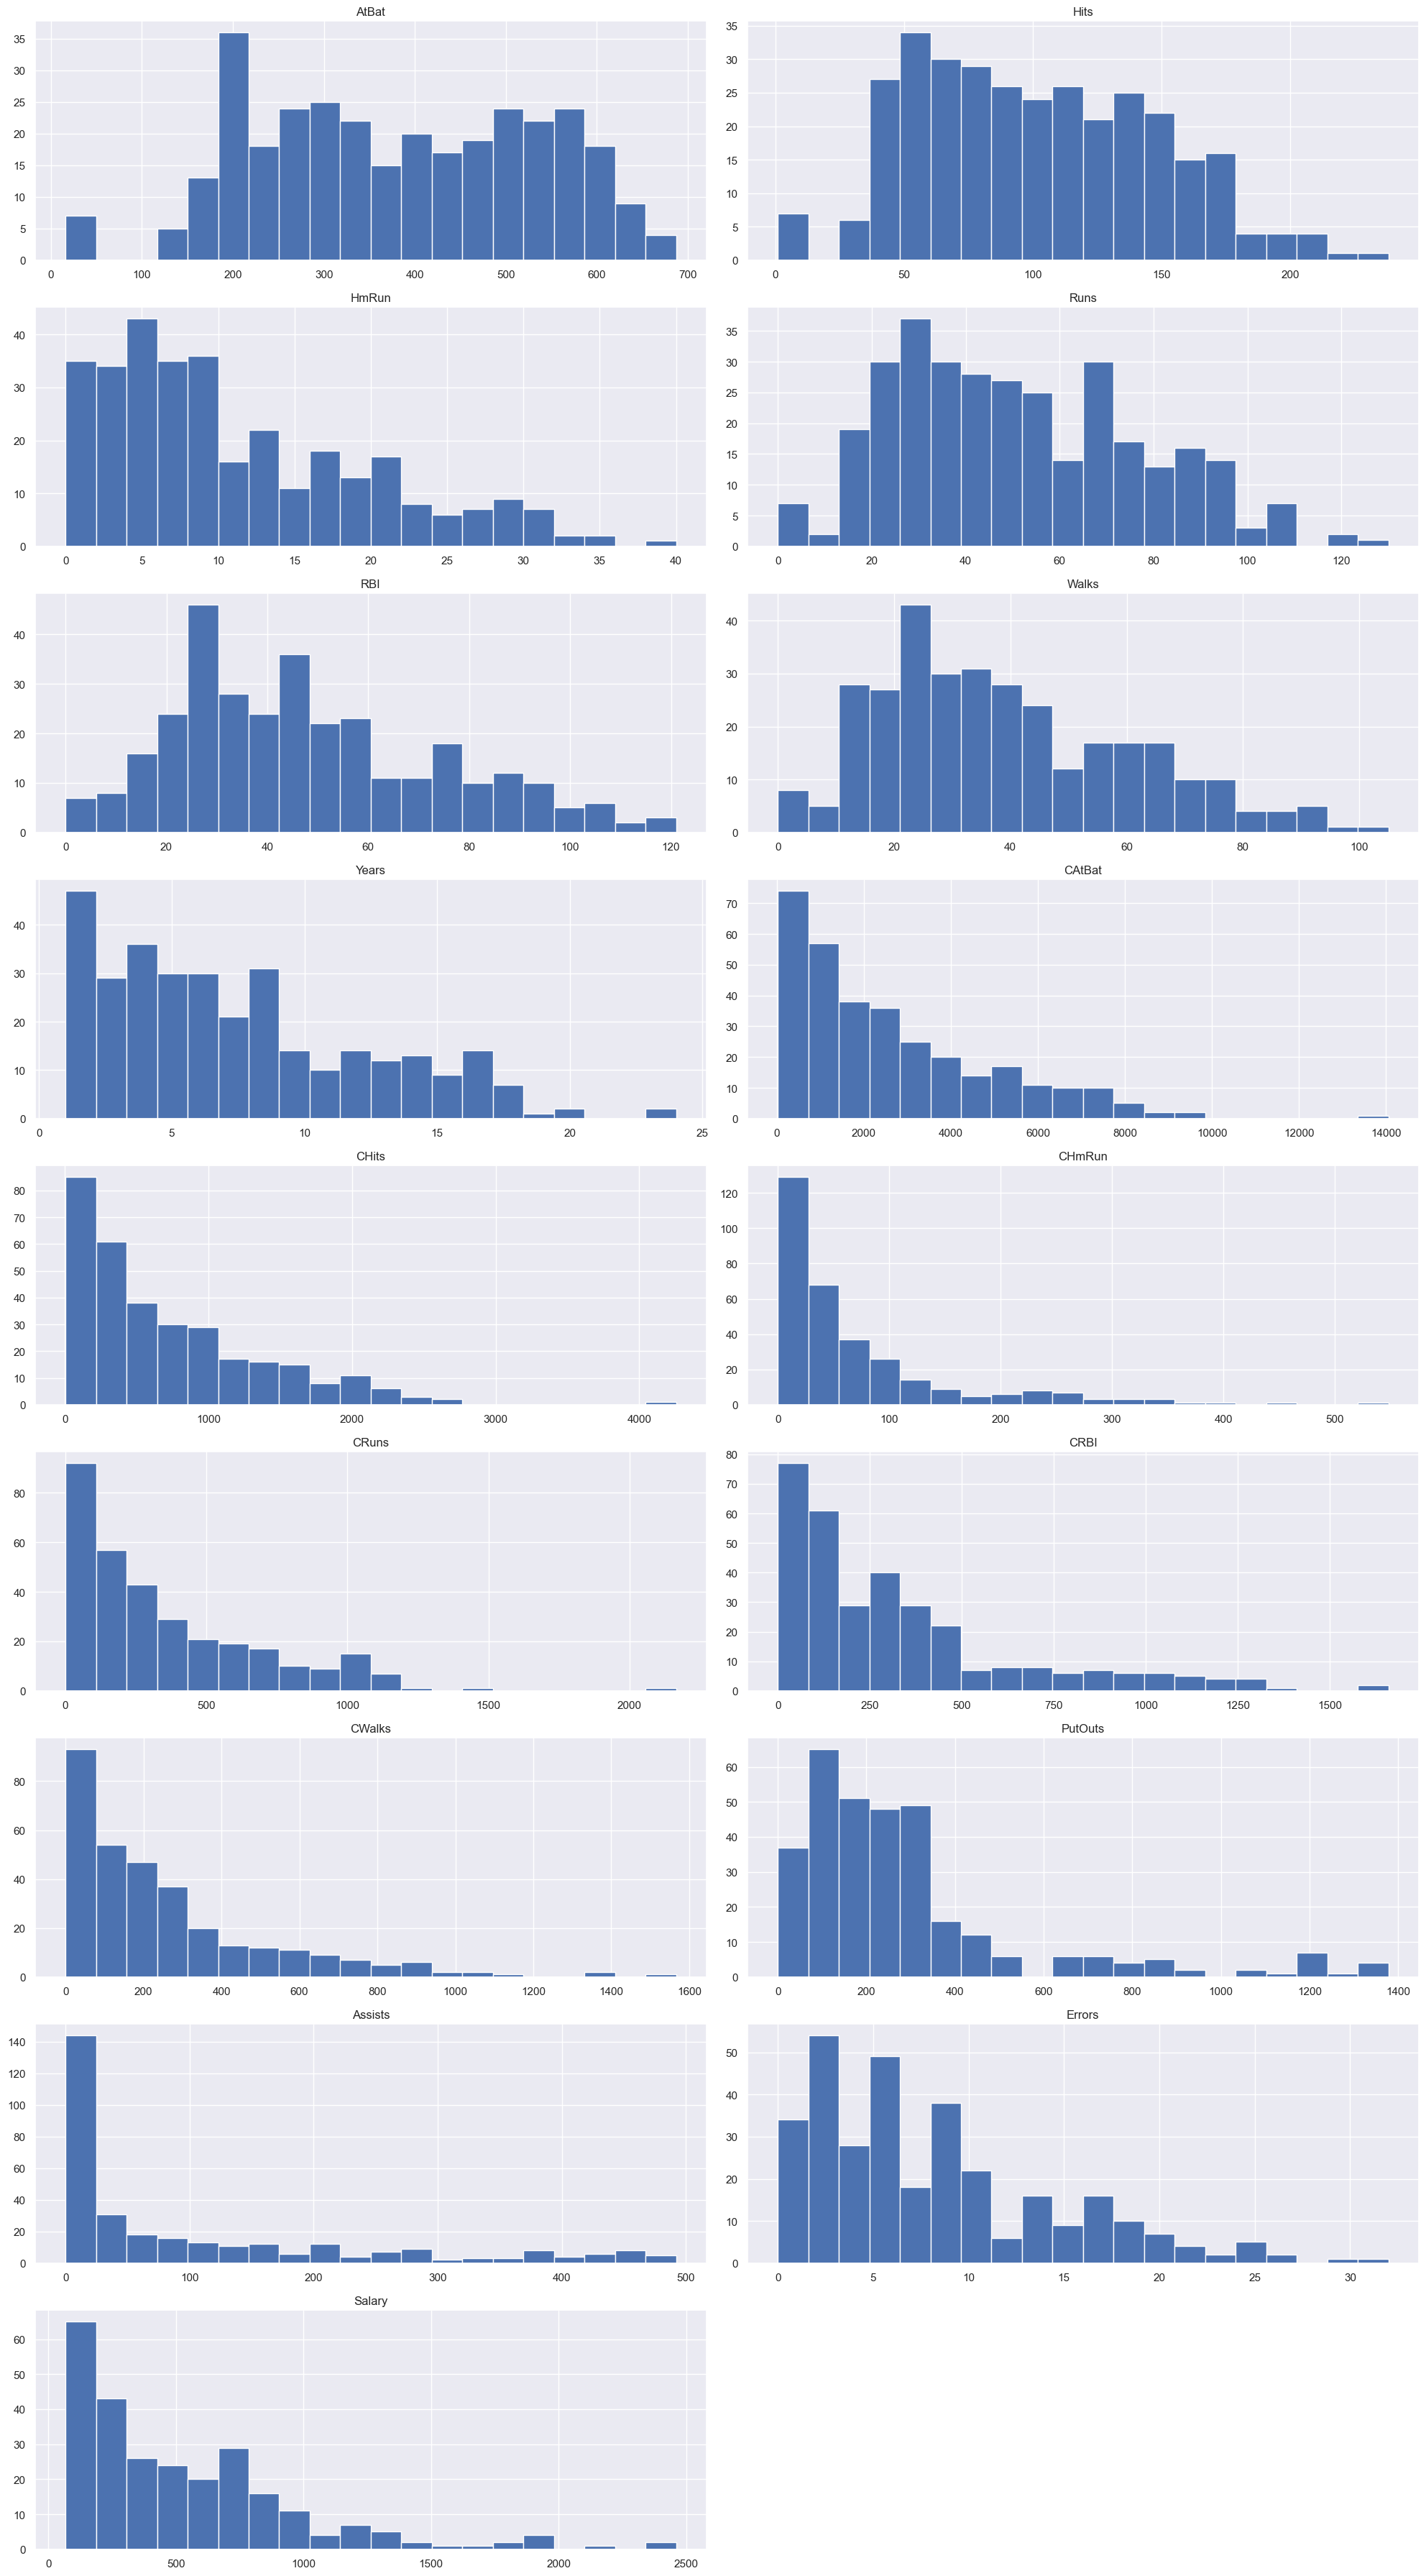

In [226]:
if __name__ == "__main__":
    main("Hitters.csv", "Salary")